<a href="https://colab.research.google.com/github/divyani95/Radiation_Analysis/blob/main/Radiation_Analysis(Best_Updated_with_deviation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Standard Deviation for Each Column (Hourly Resampled Data) - Book2.xlsx:
Radiation_GHI          177.108839
Radiation_GII          215.273260
Radiation_GHI_Acc        1.234254
Radiation_GII_Acc        1.430487
Wind_Speed               0.091836
Wind_Direction         100.789855
Humidity                 0.077804
Ambient_Temperature      1.945016
Module_Temperature       7.959692
Rain                     0.000000
Diffuse_Radiation      114.698079
Today_Rain               0.084067
dtype: float64 



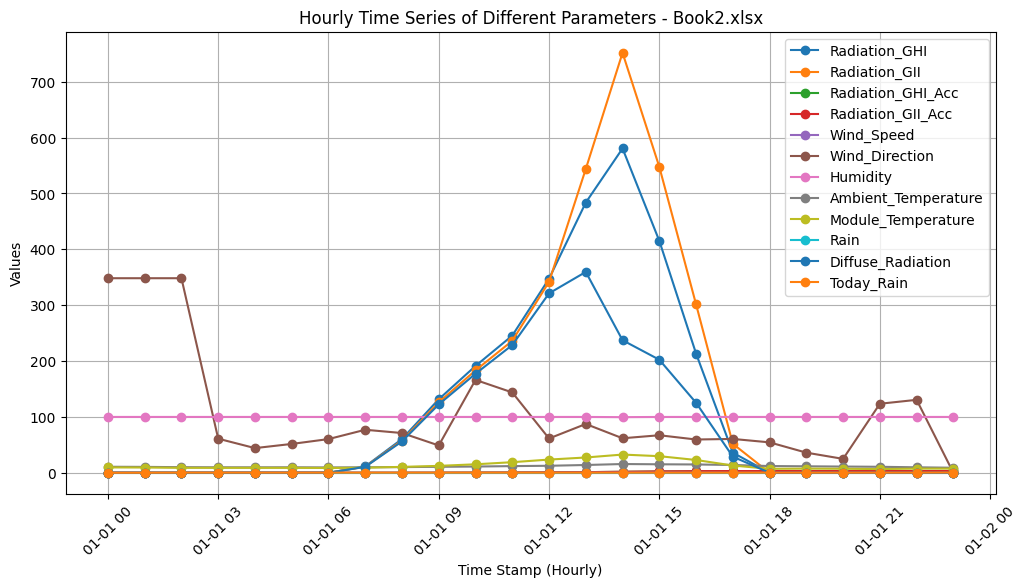

Standard Deviation for Each Column (Hourly Resampled Data) - Book3.xlsx:
Radiation_GHI          151.698536
Radiation_GII          177.461949
Radiation_GHI_Acc        1.080438
Radiation_GII_Acc        1.217760
Wind_Speed               0.072424
Wind_Direction         106.638275
Humidity                 3.833266
Ambient_Temperature      1.775497
Module_Temperature       6.842590
Rain                     0.000000
Diffuse_Radiation        0.000000
Today_Rain               0.112557
dtype: float64 



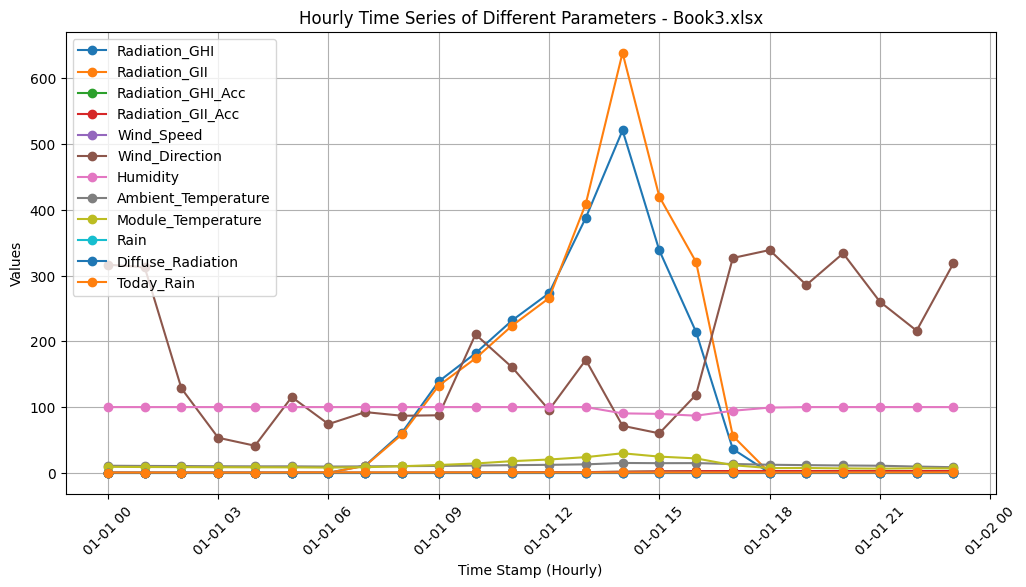

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to process each file
def process_file(file_path, file_name):
    # Load the Excel file
    df = pd.read_excel(file_path)

    # Rename columns for consistency
    df.columns = ["Time_Stamp", "Radiation_GHI", "Radiation_GII", "Radiation_GHI_Acc",
                  "Radiation_GII_Acc", "Wind_Speed", "Wind_Direction", "Humidity",
                  "Ambient_Temperature", "Module_Temperature", "Rain",
                  "Diffuse_Radiation", "Today_Rain"]

    # Convert Time_Stamp to datetime
    df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], errors="coerce")

    # Convert numeric columns
    numeric_columns = df.columns[1:]  # Exclude Time_Stamp
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

    # Drop missing values
    df = df.dropna(subset=["Time_Stamp"])

    # Set Time_Stamp as index for resampling
    df.set_index("Time_Stamp", inplace=True)

    # Resample data to hourly intervals (mean values per hour)
    df_resampled = df.resample("h").mean()

    # Calculate standard deviation for each column separately
    std_devs = df_resampled.std()

    # Print standard deviation values
    print(f"Standard Deviation for Each Column (Hourly Resampled Data) - {file_name}:")
    print(std_devs, "\n")

    # Plot each resampled column against Time_Stamp
    plt.figure(figsize=(12, 6))
    for col in numeric_columns:
        plt.plot(df_resampled.index, df_resampled[col], label=col, marker='o', linestyle="-")

    plt.xlabel("Time Stamp (Hourly)")
    plt.ylabel("Values")
    plt.title(f"Hourly Time Series of Different Parameters - {file_name}")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Process both files
process_file("/content/Book2.xlsx", "Book2.xlsx")
process_file("/content/Book3.xlsx", "Book3.xlsx")

Standard Deviation for Each Column in Book2.xlsx:
Radiation_GHI          177.108839
Radiation_GII          215.273260
Radiation_GHI_Acc        1.234254
Radiation_GII_Acc        1.430487
Wind_Speed               0.091836
Wind_Direction         100.789855
Humidity                 0.077804
Ambient_Temperature      1.945016
Module_Temperature       7.959692
Rain                     0.000000
Diffuse_Radiation      114.698079
Today_Rain               0.084067
dtype: float64 

Standard Deviation for Each Column in Book3.xlsx:
Radiation_GHI          151.698536
Radiation_GII          177.461949
Radiation_GHI_Acc        1.080438
Radiation_GII_Acc        1.217760
Wind_Speed               0.072424
Wind_Direction         106.638275
Humidity                 3.833266
Ambient_Temperature      1.775497
Module_Temperature       6.842590
Rain                     0.000000
Diffuse_Radiation        0.000000
Today_Rain               0.112557
dtype: float64 

Standard Deviation of the Difference Between the T

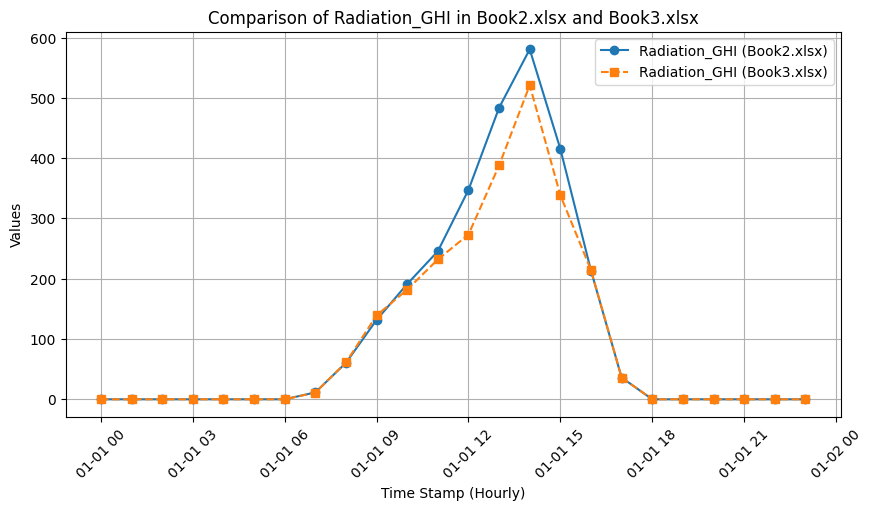

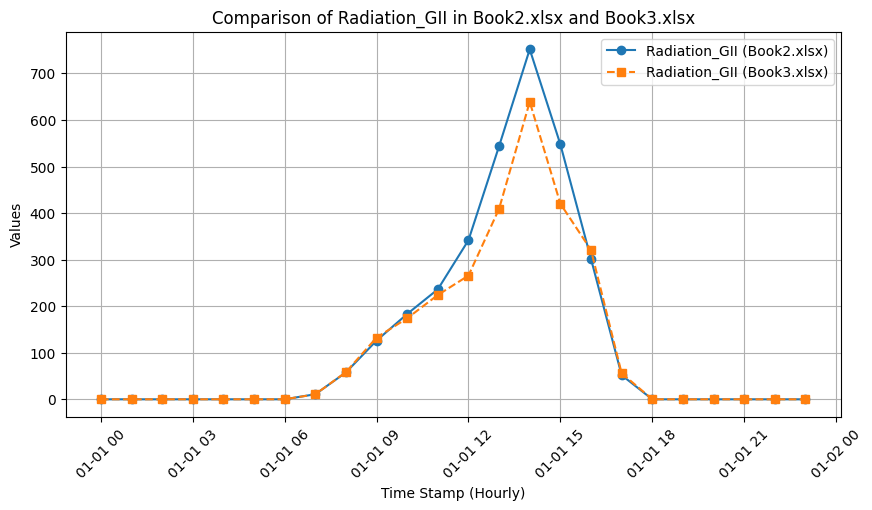

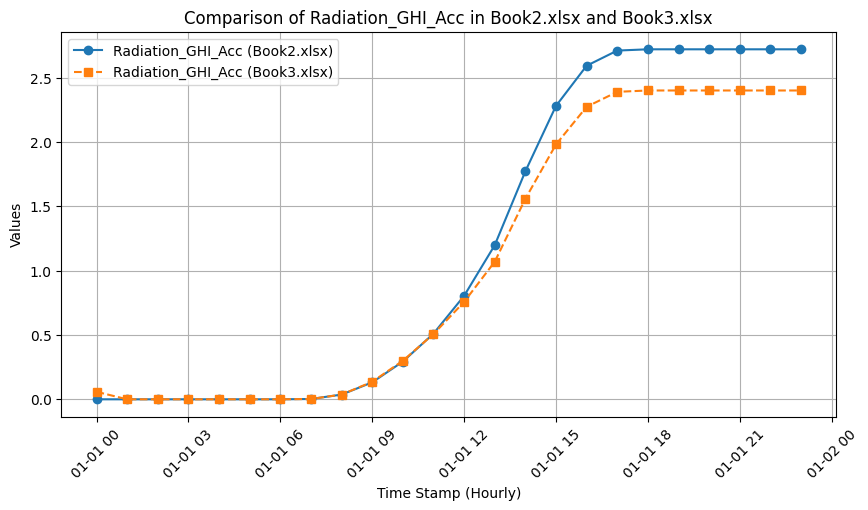

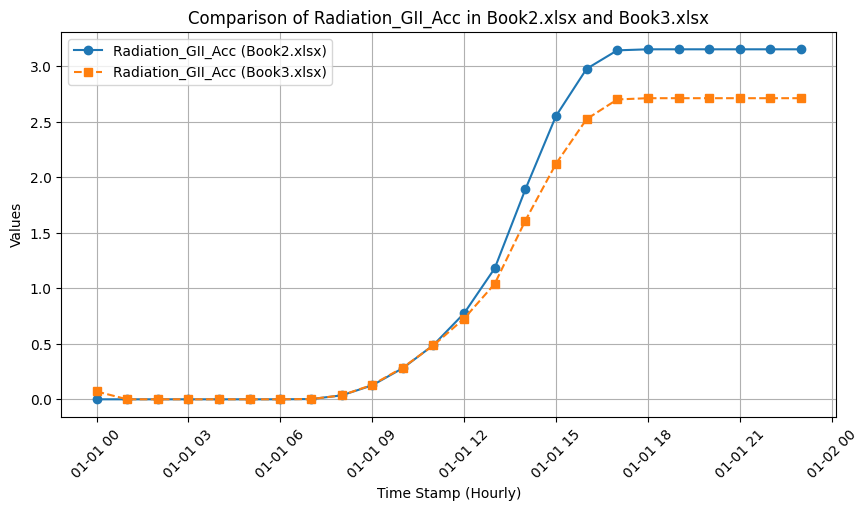

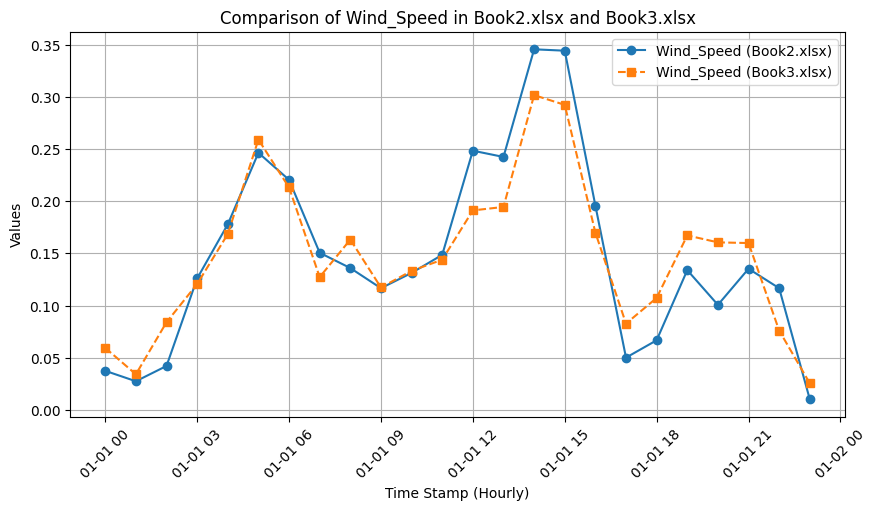

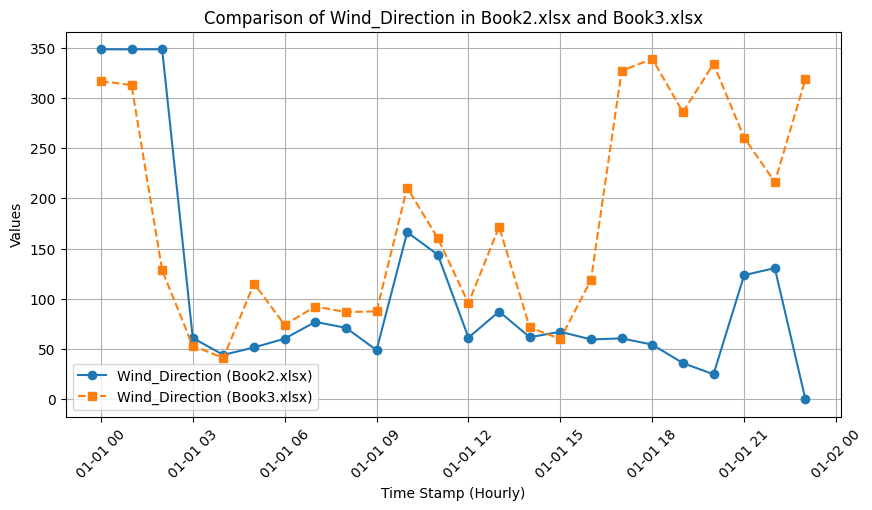

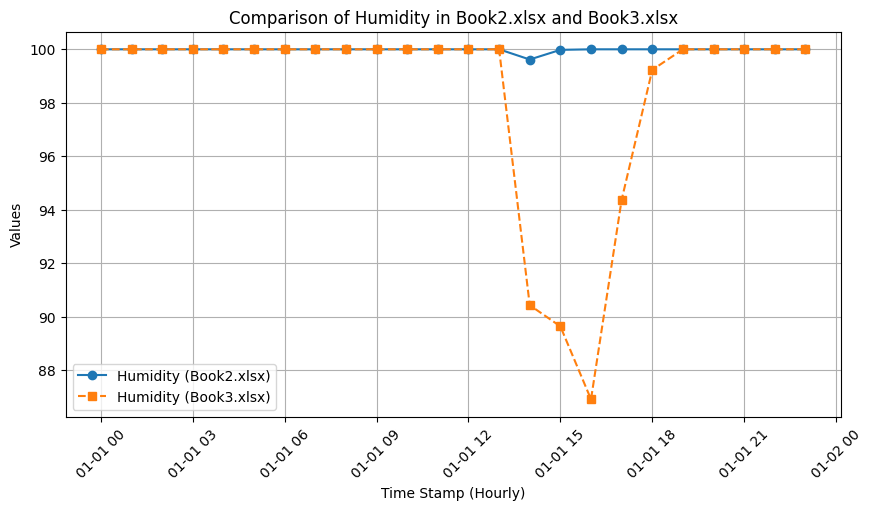

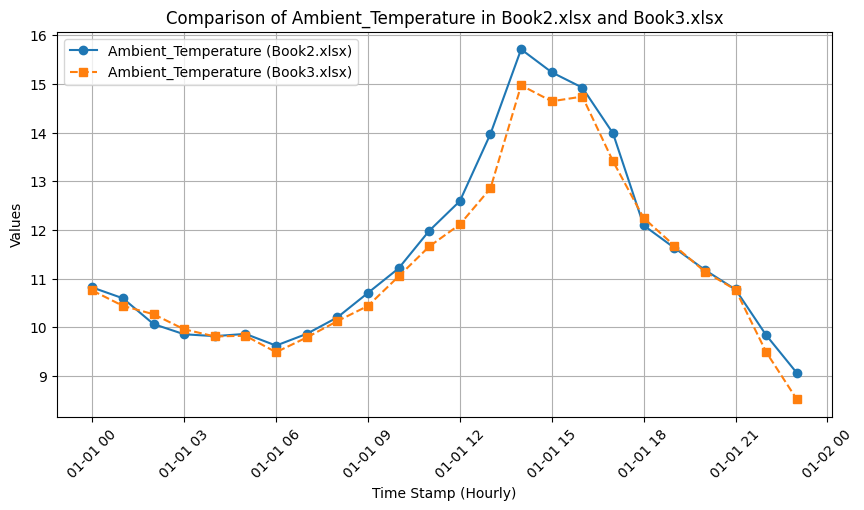

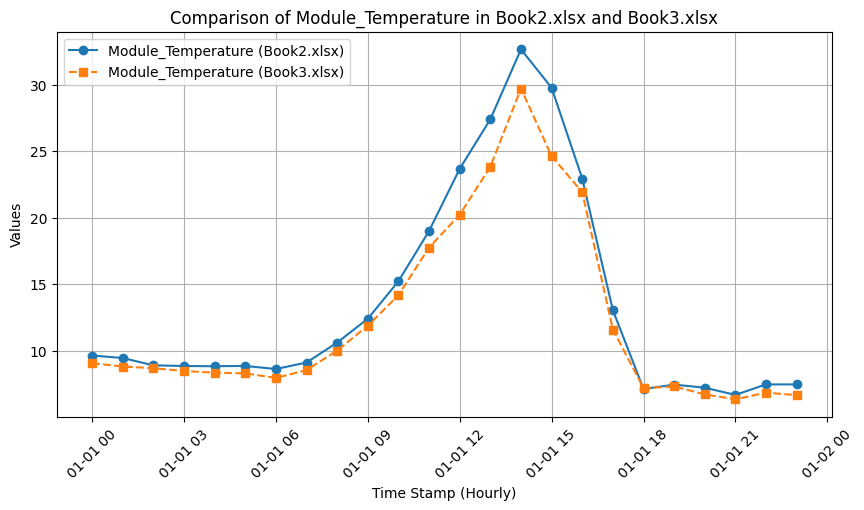

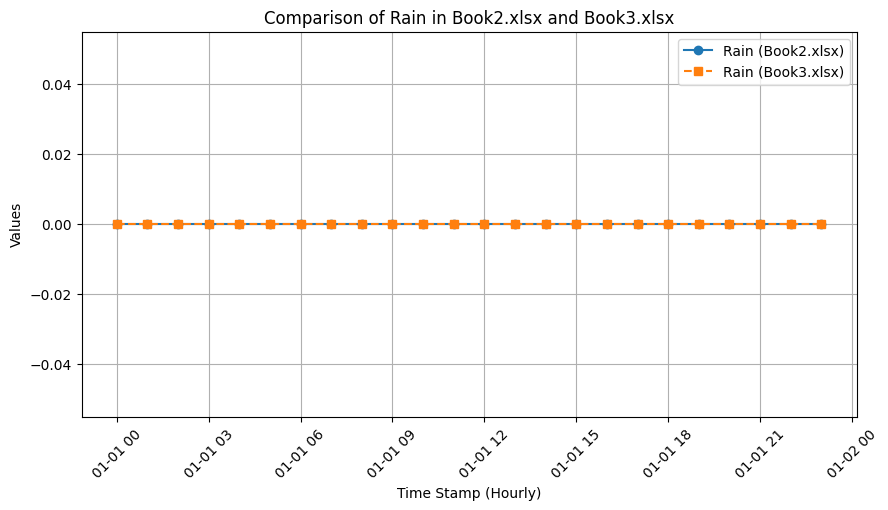

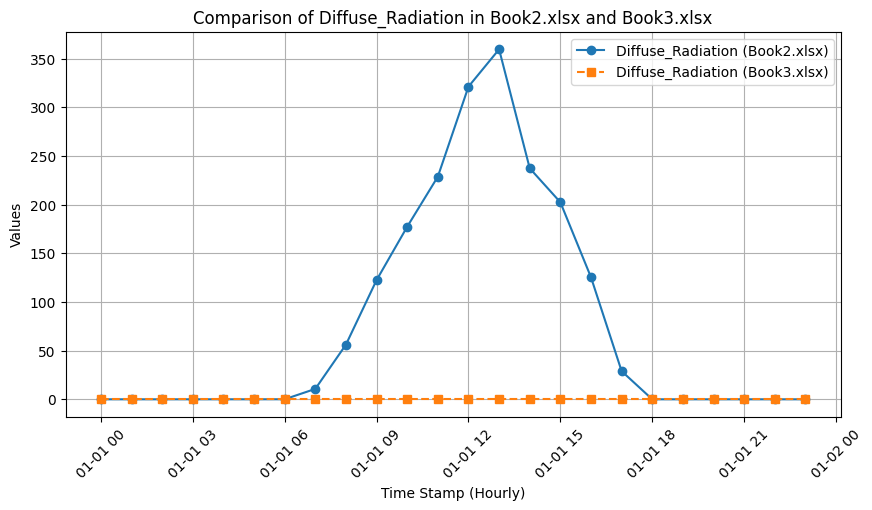

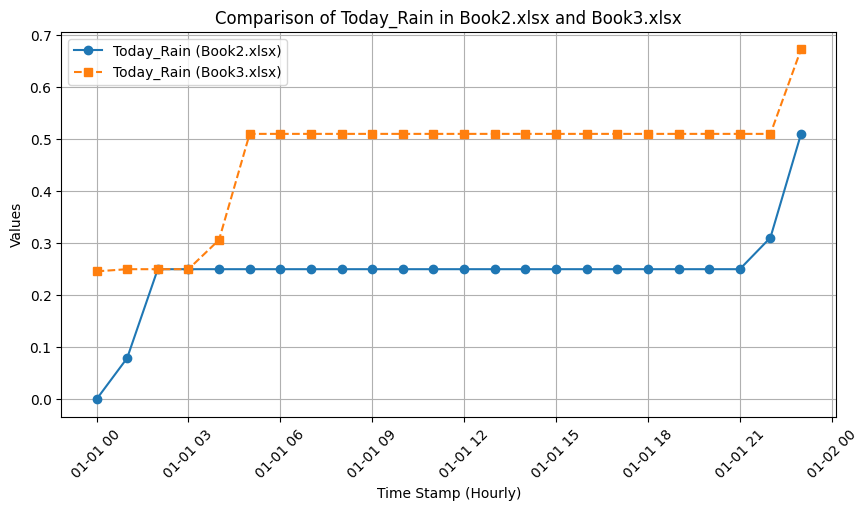

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to process each file and return resampled dataframe
def process_file(file_path):
    # Load the Excel file
    df = pd.read_excel(file_path)

    # Rename columns for consistency
    df.columns = ["Time_Stamp", "Radiation_GHI", "Radiation_GII", "Radiation_GHI_Acc",
                  "Radiation_GII_Acc", "Wind_Speed", "Wind_Direction", "Humidity",
                  "Ambient_Temperature", "Module_Temperature", "Rain",
                  "Diffuse_Radiation", "Today_Rain"]

    # Convert Time_Stamp to datetime
    df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], errors="coerce")

    # Convert numeric columns
    numeric_columns = df.columns[1:]  # Exclude Time_Stamp
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

    # Drop missing values
    df = df.dropna(subset=["Time_Stamp"])

    # Set Time_Stamp as index for resampling
    df.set_index("Time_Stamp", inplace=True)

    # Resample data to hourly intervals (mean values per hour)
    df_resampled = df.resample("h").mean()

    return df_resampled

# Process both files
df_resampled_1 = process_file("/content/Book2.xlsx")
df_resampled_2 = process_file("/content/Book3.xlsx")

# Ensure both datasets have the same time index
df_resampled_1, df_resampled_2 = df_resampled_1.align(df_resampled_2, join="inner")

# Get the common columns
common_columns = df_resampled_1.columns.intersection(df_resampled_2.columns)

# Calculate standard deviation for each column separately
std_dev_1 = df_resampled_1[common_columns].std()
std_dev_2 = df_resampled_2[common_columns].std()

# Calculate standard deviation of the difference between both datasets
std_dev_diff = (df_resampled_1[common_columns] - df_resampled_2[common_columns]).std()

# Print standard deviation values
print("Standard Deviation for Each Column in Book2.xlsx:")
print(std_dev_1, "\n")

print("Standard Deviation for Each Column in Book3.xlsx:")
print(std_dev_2, "\n")

print("Standard Deviation of the Difference Between the Two Files Column-wise:")
print(std_dev_diff, "\n")

# Plot the same column from both files on the same graph
for col in common_columns:
    plt.figure(figsize=(10, 5))

    plt.plot(df_resampled_1.index, df_resampled_1[col], marker='o', linestyle="-", label=f"{col} (Book2.xlsx)")
    plt.plot(df_resampled_2.index, df_resampled_2[col], marker='s', linestyle="--", label=f"{col} (Book3.xlsx)")

    plt.xlabel("Time Stamp (Hourly)")
    plt.ylabel("Values")
    plt.title(f"Comparison of {col} in Book2.xlsx and Book3.xlsx")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    plt.show()

Standard Deviation for Each Column in Book2.xlsx:
Radiation_GHI          177.108839
Radiation_GII          215.273260
Radiation_GHI_Acc        1.234254
Radiation_GII_Acc        1.430487
Wind_Speed               0.091836
Wind_Direction         100.789855
Humidity                 0.077804
Ambient_Temperature      1.945016
Module_Temperature       7.959692
Rain                     0.000000
Diffuse_Radiation      114.698079
Today_Rain               0.084067
dtype: float64 

Standard Deviation for Each Column in Book3.xlsx:
Radiation_GHI          151.698536
Radiation_GII          177.461949
Radiation_GHI_Acc        1.080438
Radiation_GII_Acc        1.217760
Wind_Speed               0.072424
Wind_Direction         106.638275
Humidity                 3.833266
Ambient_Temperature      1.775497
Module_Temperature       6.842590
Rain                     0.000000
Diffuse_Radiation        0.000000
Today_Rain               0.112557
dtype: float64 

Standard Deviation of the Difference Between the T

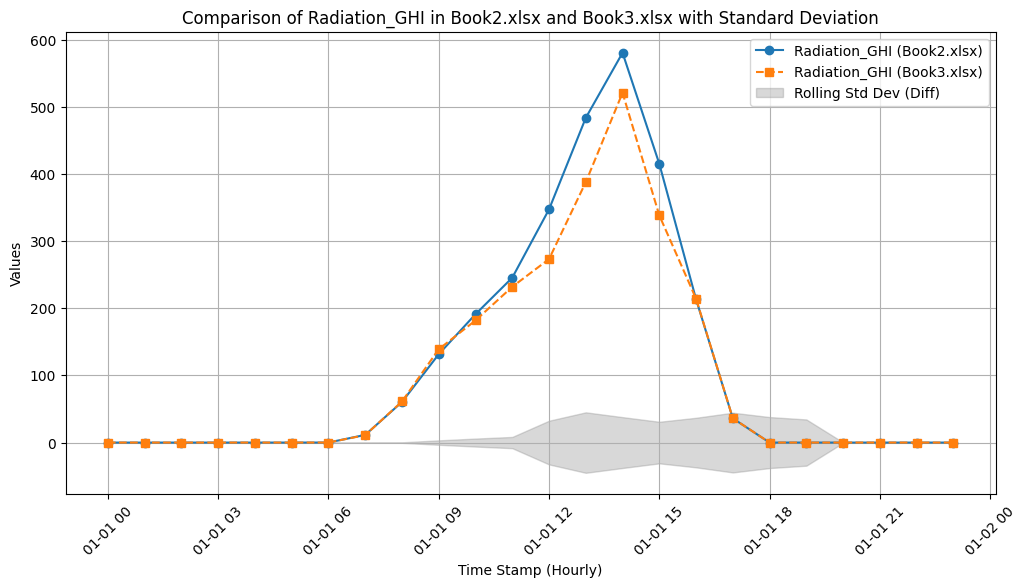

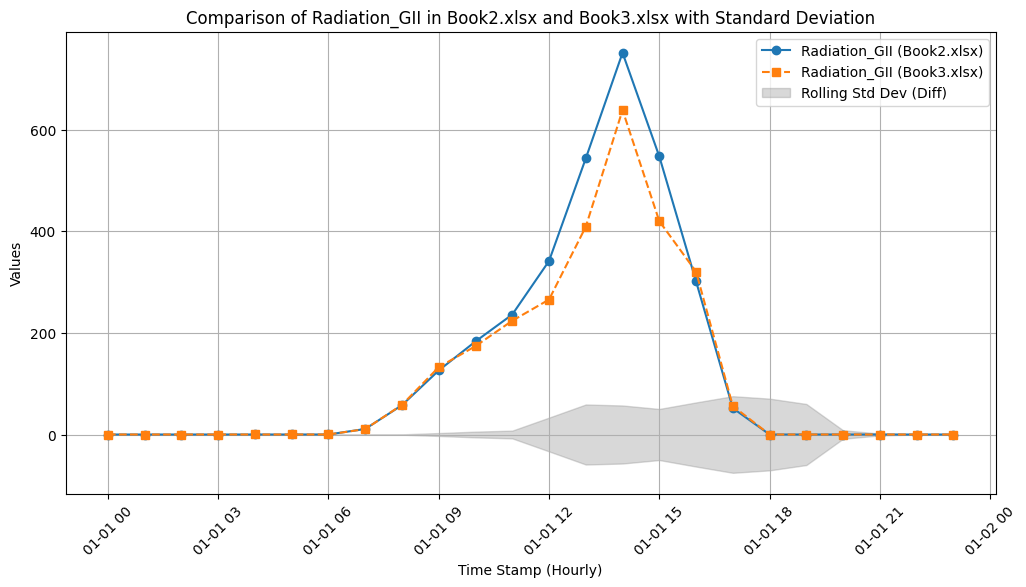

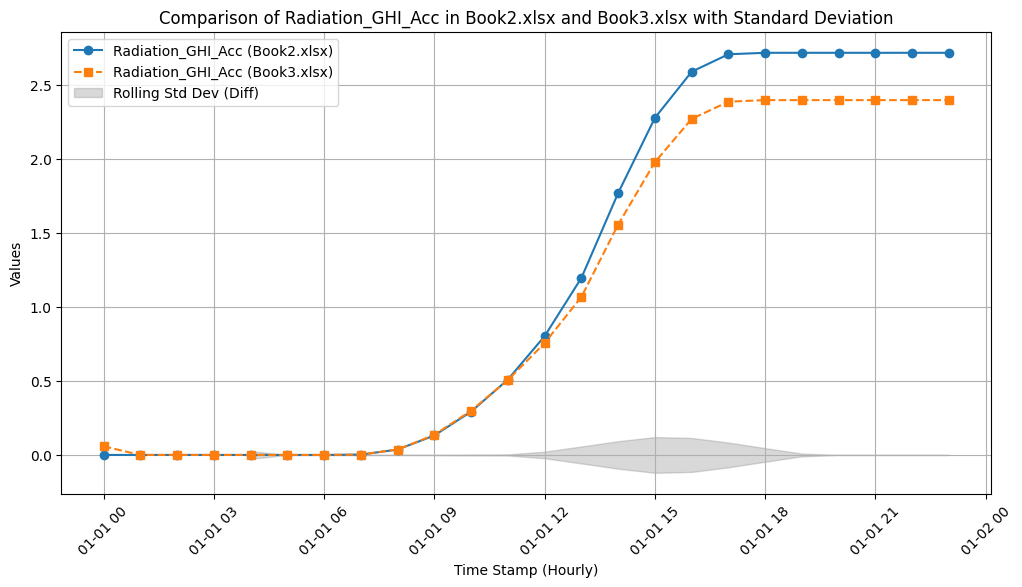

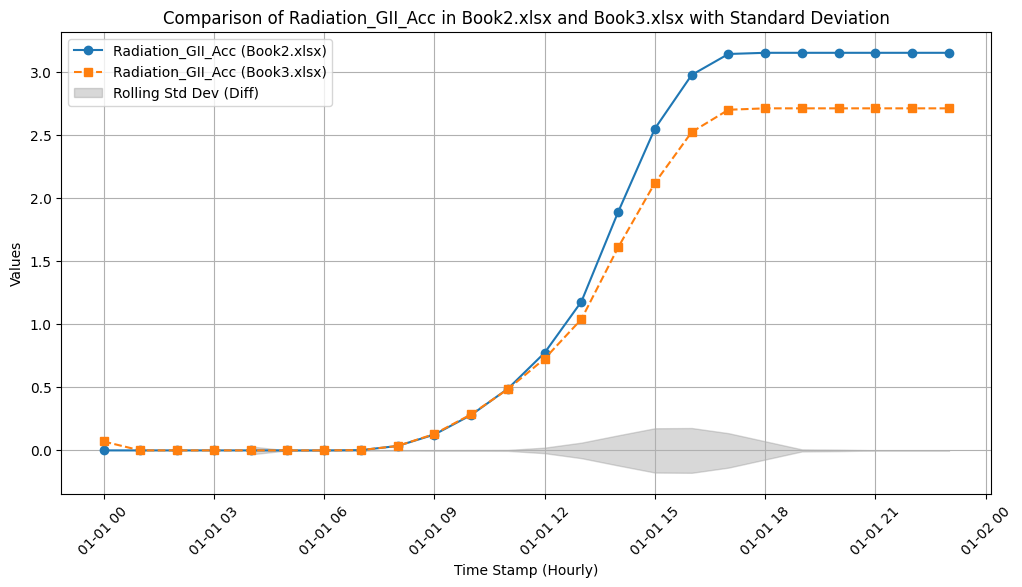

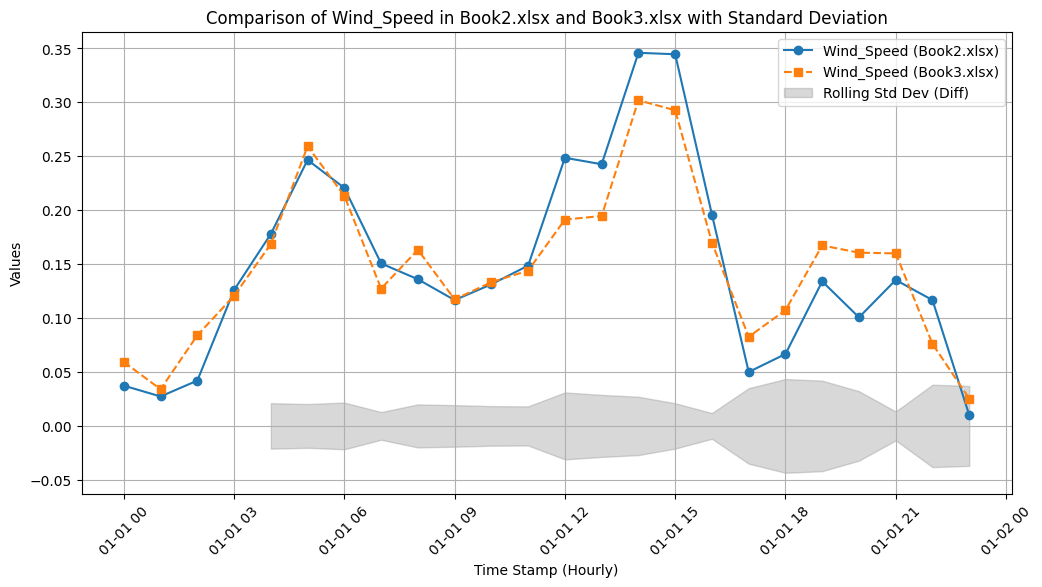

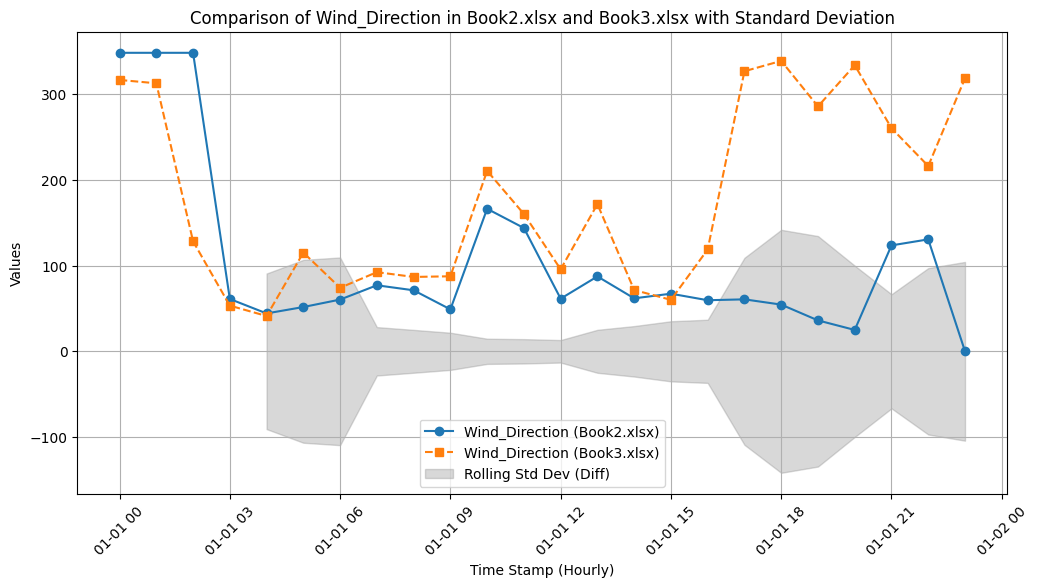

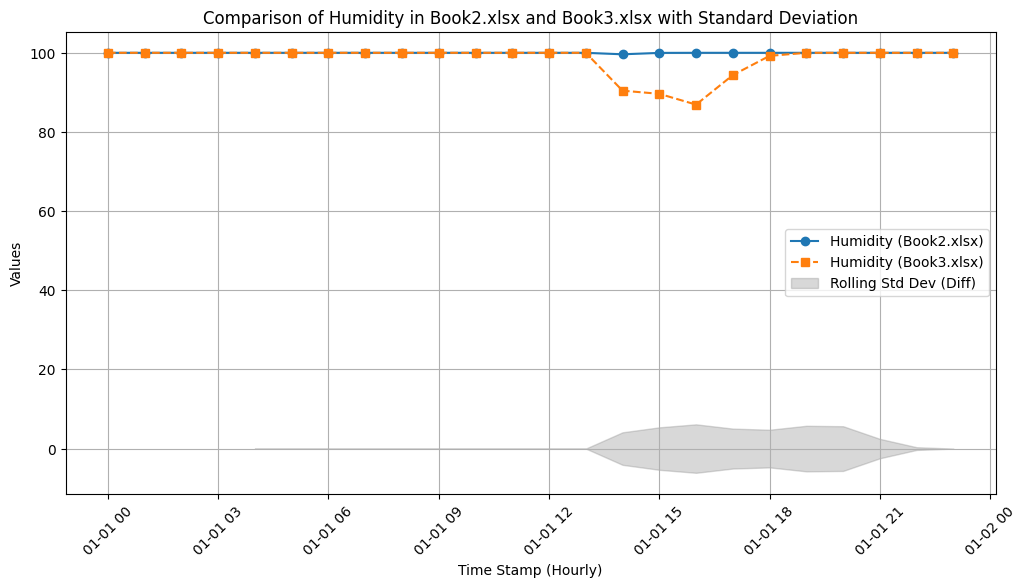

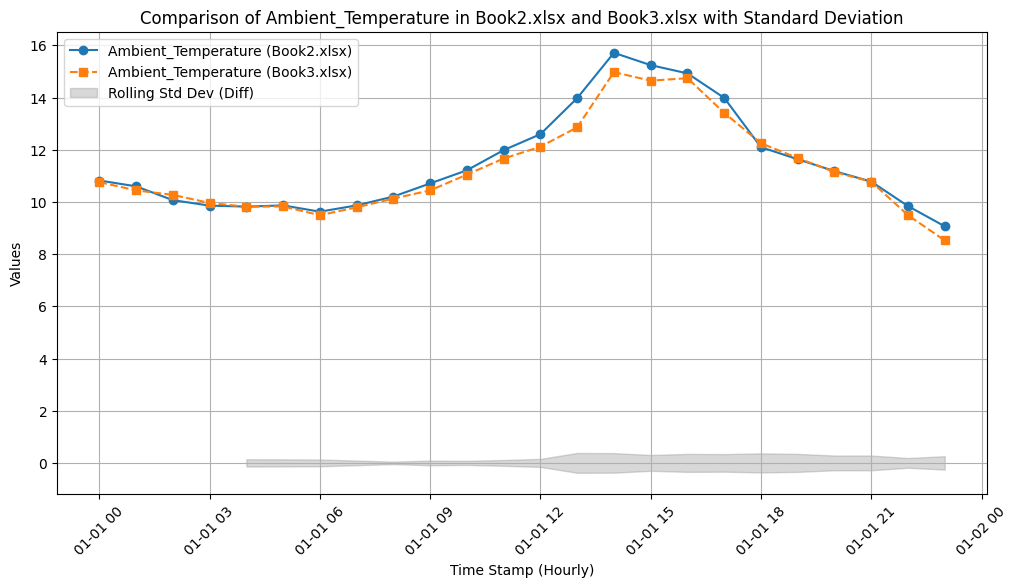

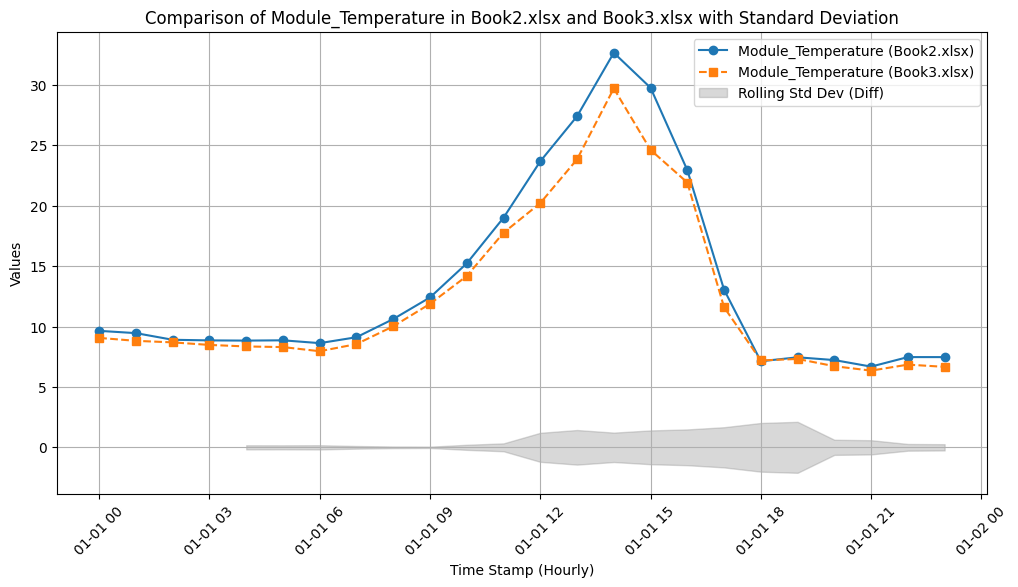

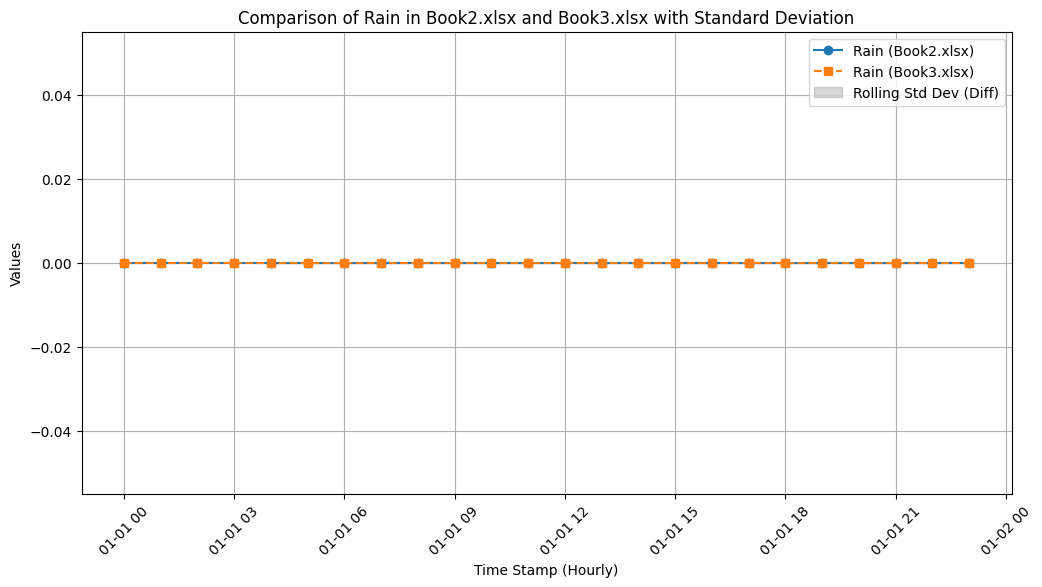

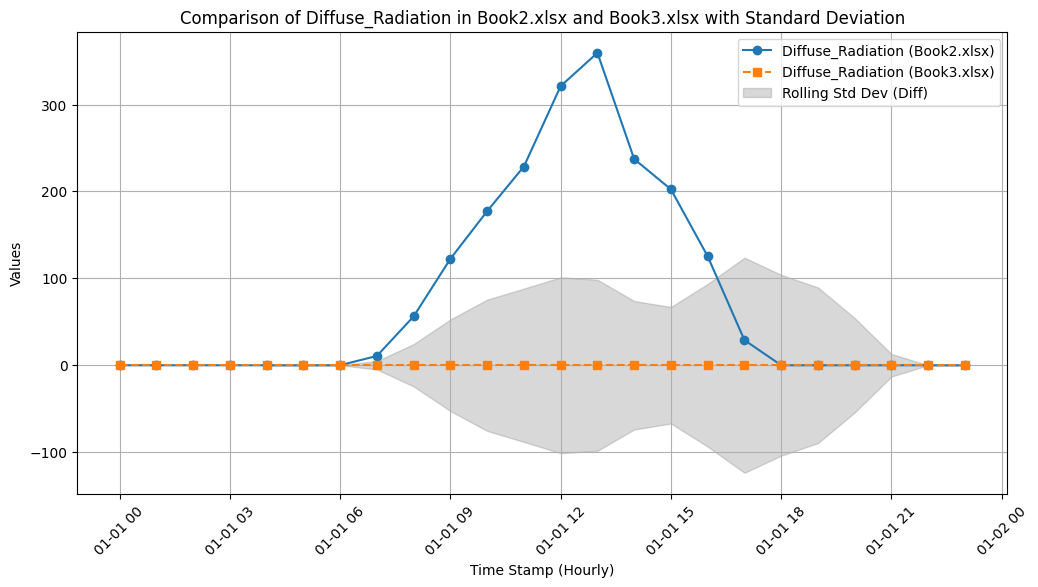

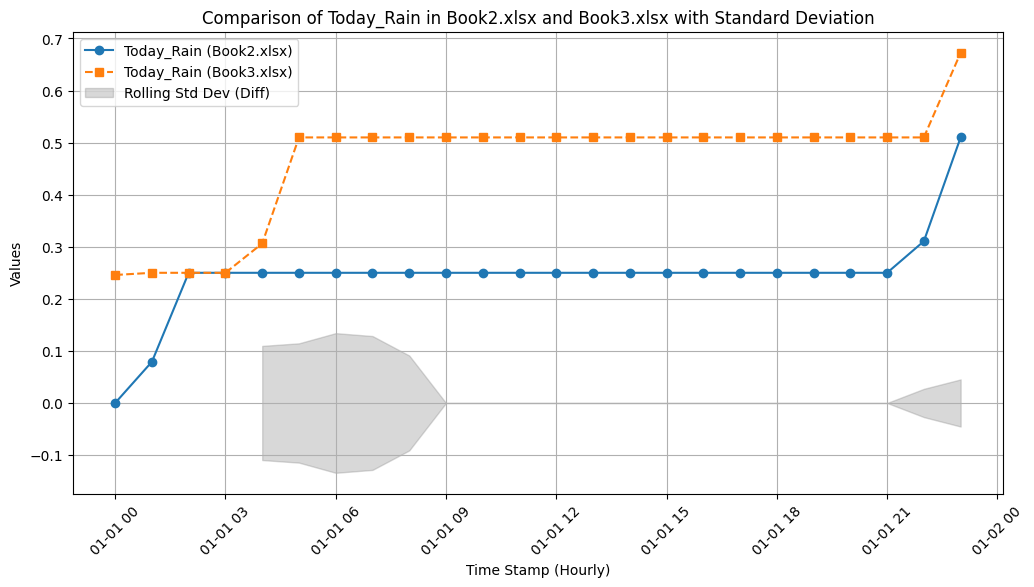

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to process each file and return resampled dataframe
def process_file(file_path):
    # Load the Excel file
    df = pd.read_excel(file_path)

    # Rename columns for consistency
    df.columns = ["Time_Stamp", "Radiation_GHI", "Radiation_GII", "Radiation_GHI_Acc",
                  "Radiation_GII_Acc", "Wind_Speed", "Wind_Direction", "Humidity",
                  "Ambient_Temperature", "Module_Temperature", "Rain",
                  "Diffuse_Radiation", "Today_Rain"]

    # Convert Time_Stamp to datetime
    df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], errors="coerce")

    # Convert numeric columns
    numeric_columns = df.columns[1:]  # Exclude Time_Stamp
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

    # Drop missing values
    df = df.dropna(subset=["Time_Stamp"])

    # Set Time_Stamp as index for resampling
    df.set_index("Time_Stamp", inplace=True)

    # Resample data to hourly intervals (mean values per hour)
    df_resampled = df.resample("h").mean()

    return df_resampled

# Process both files
df_resampled_1 = process_file("/content/Book2.xlsx")
df_resampled_2 = process_file("/content/Book3.xlsx")

# Ensure both datasets have the same time index
df_resampled_1, df_resampled_2 = df_resampled_1.align(df_resampled_2, join="inner")

# Get the common columns
common_columns = df_resampled_1.columns.intersection(df_resampled_2.columns)

# Calculate standard deviation for each column separately
std_dev_1 = df_resampled_1[common_columns].std()
std_dev_2 = df_resampled_2[common_columns].std()

# Calculate standard deviation of the difference between both datasets
std_dev_diff = (df_resampled_1[common_columns] - df_resampled_2[common_columns]).std()

# Print standard deviation values
print("Standard Deviation for Each Column in Book2.xlsx:")
print(std_dev_1, "\n")

print("Standard Deviation for Each Column in Book3.xlsx:")
print(std_dev_2, "\n")

print("Standard Deviation of the Difference Between the Two Files Column-wise:")
print(std_dev_diff, "\n")

# Plot the same column from both files on the same graph with standard deviation
for col in common_columns:
    plt.figure(figsize=(12, 6))

    # Plot data from both files
    plt.plot(df_resampled_1.index, df_resampled_1[col], marker='o', linestyle="-", label=f"{col} (Book2.xlsx)")
    plt.plot(df_resampled_2.index, df_resampled_2[col], marker='s', linestyle="--", label=f"{col} (Book3.xlsx)")

    # Overlay standard deviation as a shaded area
    std_dev_series = (df_resampled_1[col] - df_resampled_2[col]).rolling(window=5).std()
    plt.fill_between(df_resampled_1.index, -std_dev_series, std_dev_series, color='gray', alpha=0.3, label="Rolling Std Dev (Diff)")

    plt.xlabel("Time Stamp (Hourly)")
    plt.ylabel("Values")
    plt.title(f"Comparison of {col} in Book2.xlsx and Book3.xlsx with Standard Deviation")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    plt.show()

Standard Deviation Between Graphs (Column-wise):
Radiation_GHI           29.599134
Radiation_GII           44.427492
Radiation_GHI_Acc        0.155279
Radiation_GII_Acc        0.214885
Wind_Speed               0.032821
Wind_Direction         128.863230
Humidity                 3.797537
Ambient_Temperature      0.314636
Module_Temperature       1.294842
Rain                     0.000000
Diffuse_Radiation      114.698079
Today_Rain               0.082772
dtype: float64 



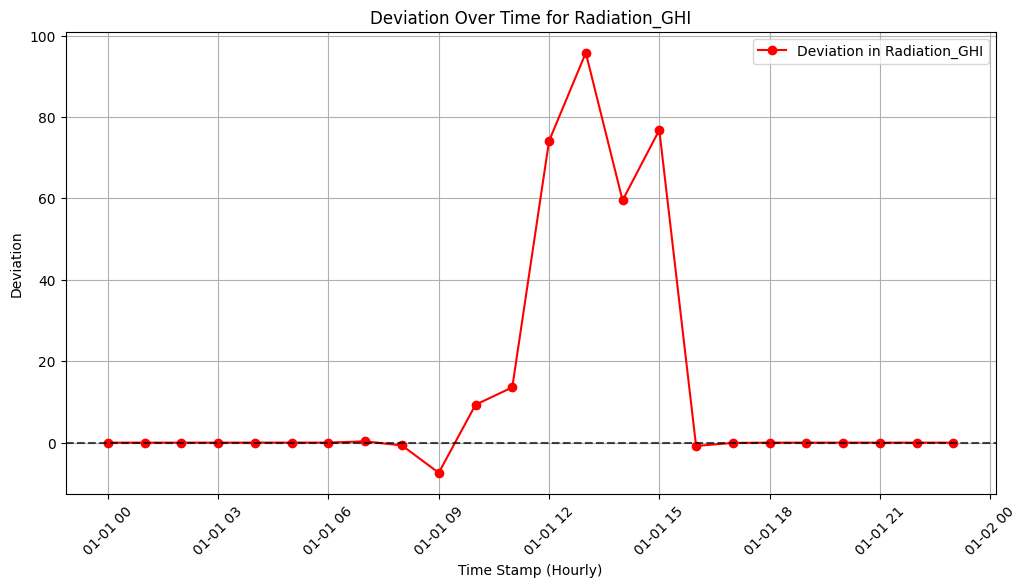

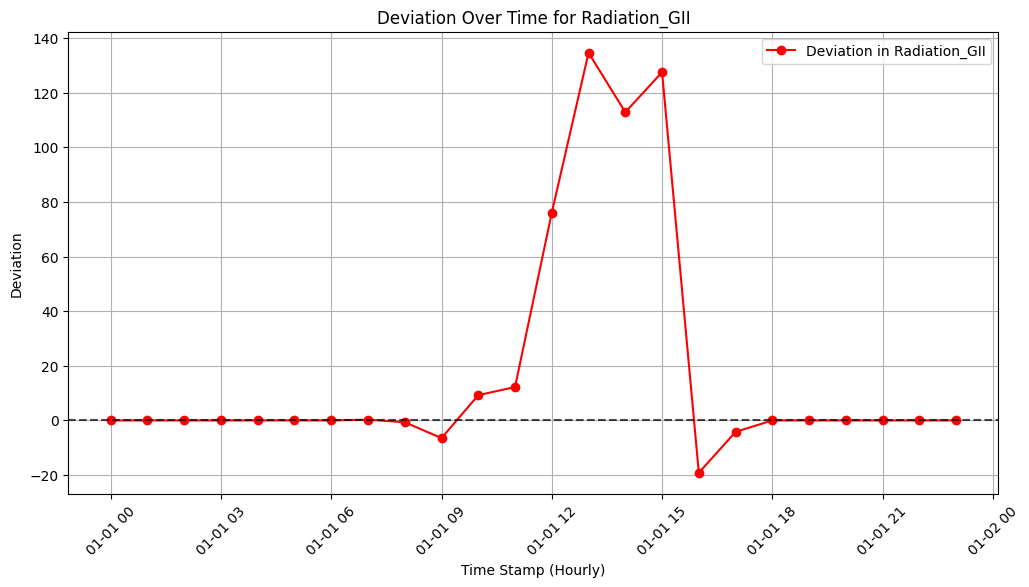

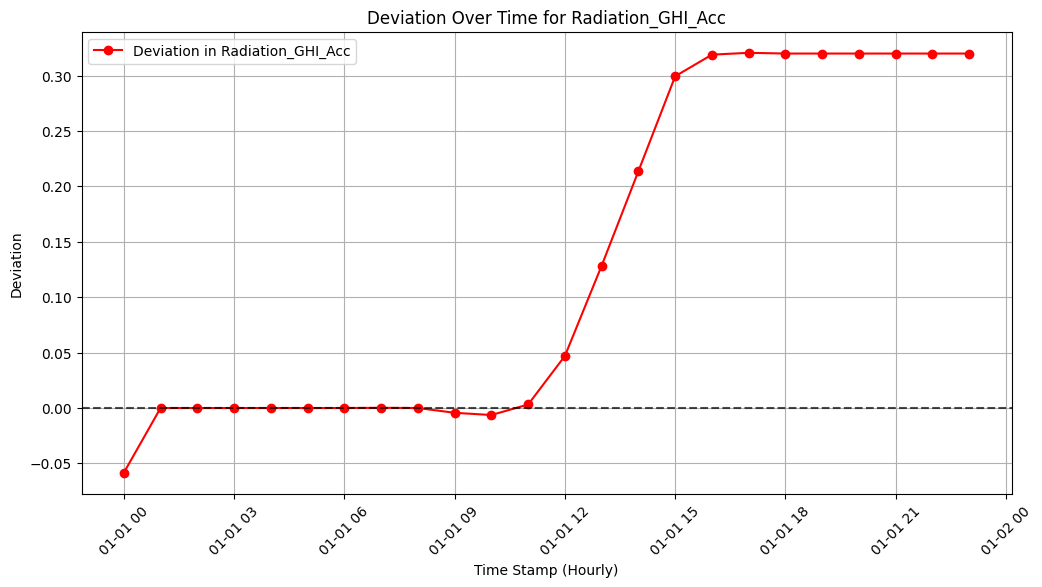

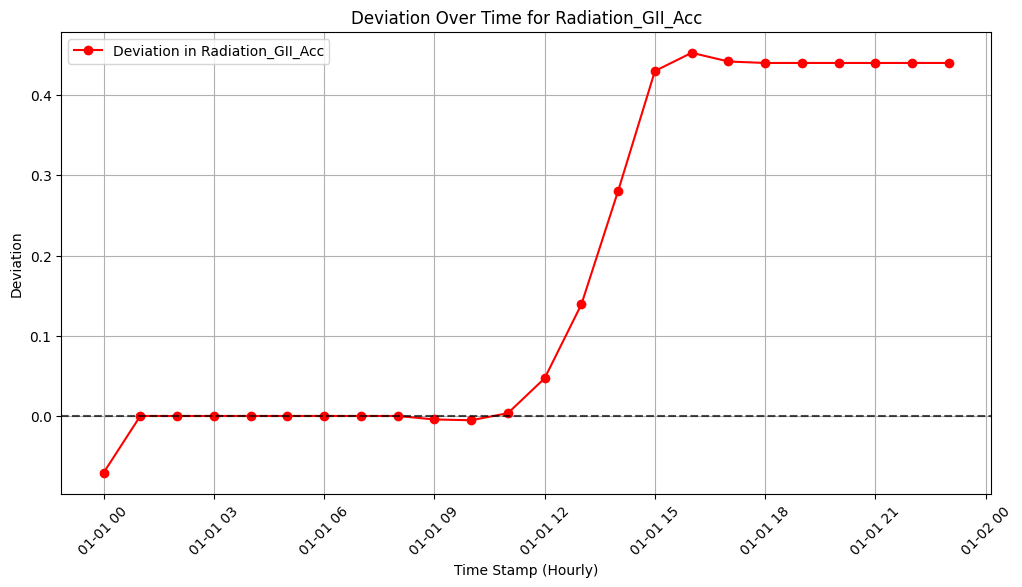

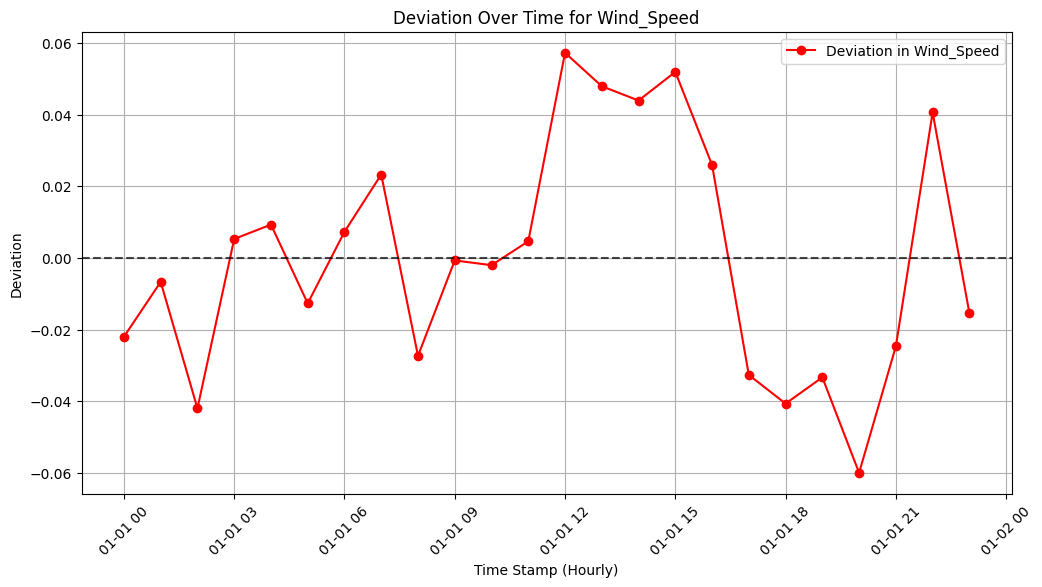

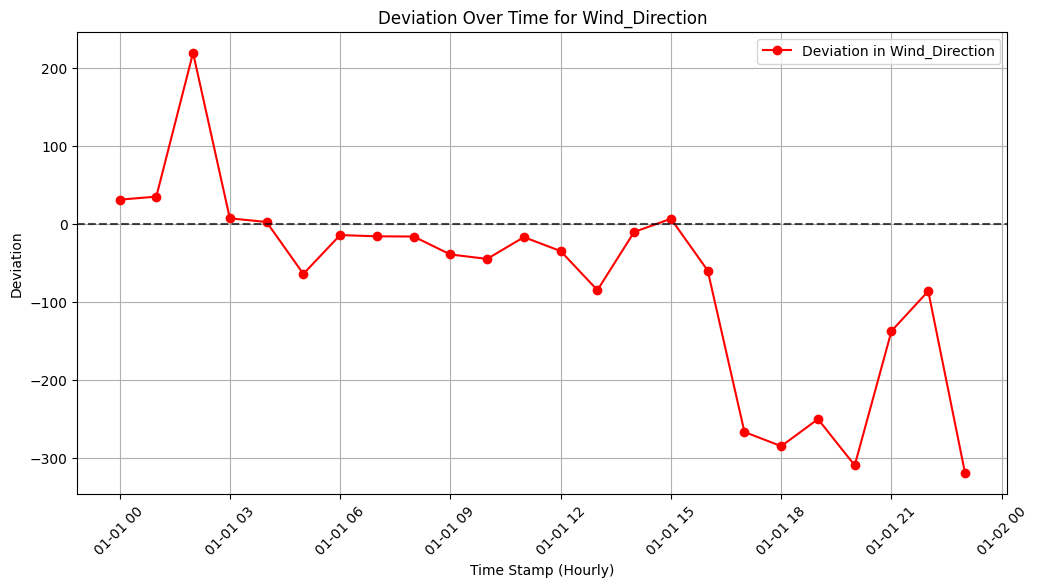

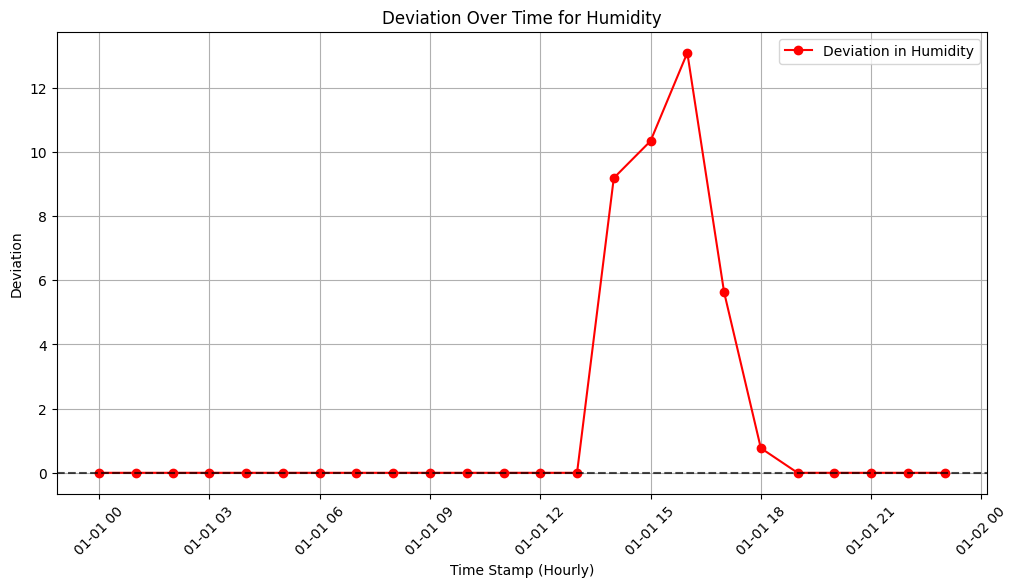

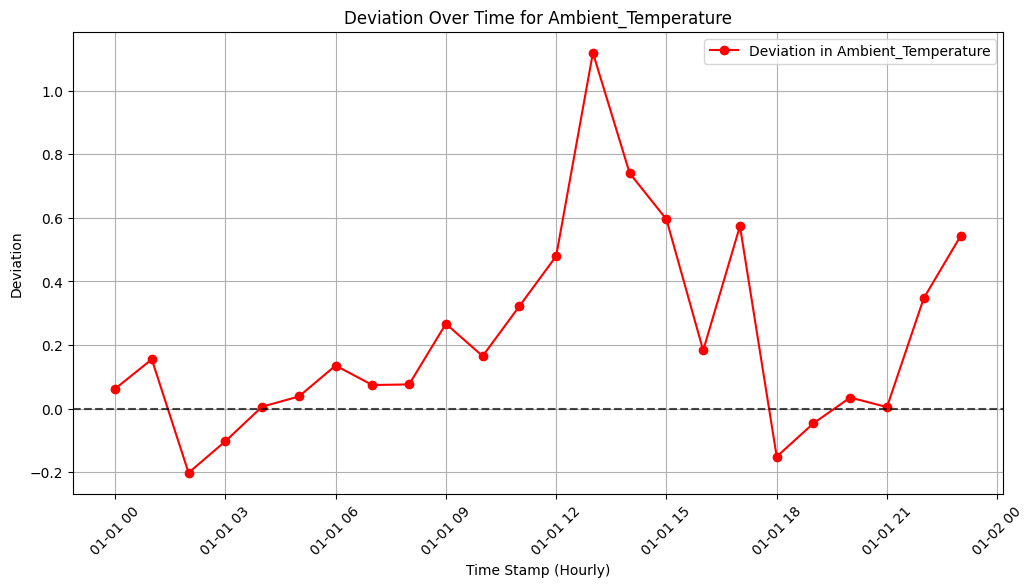

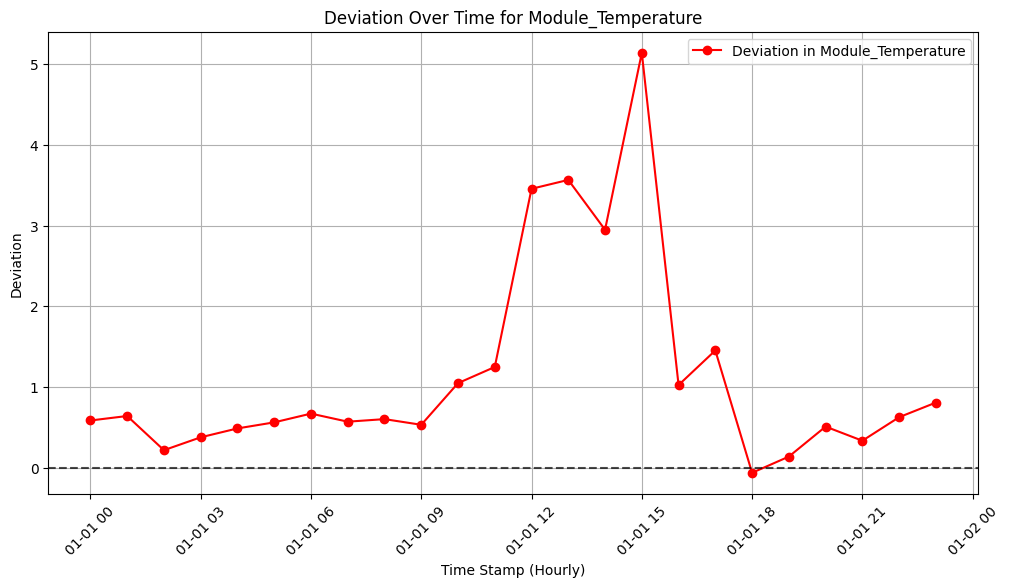

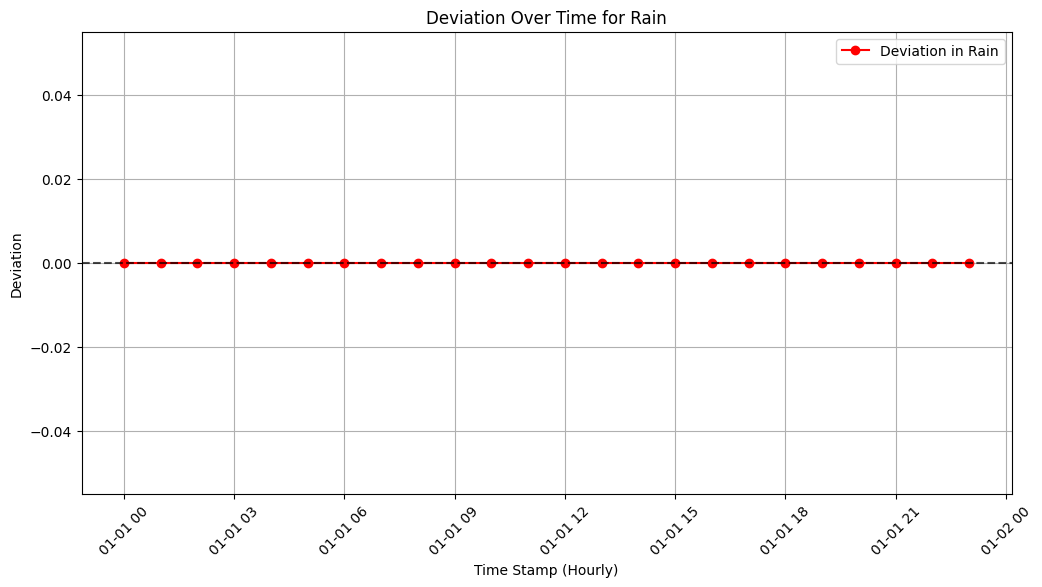

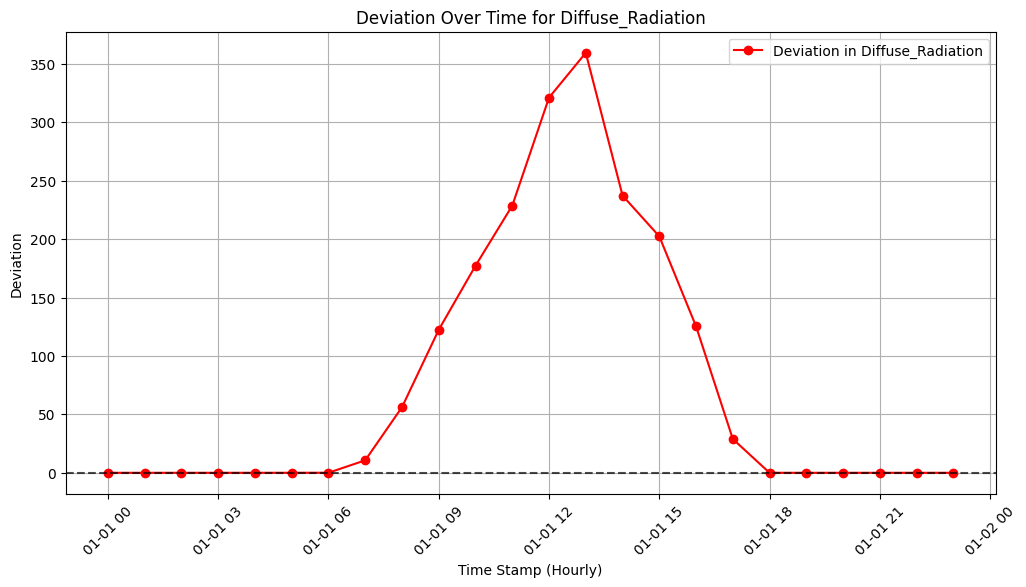

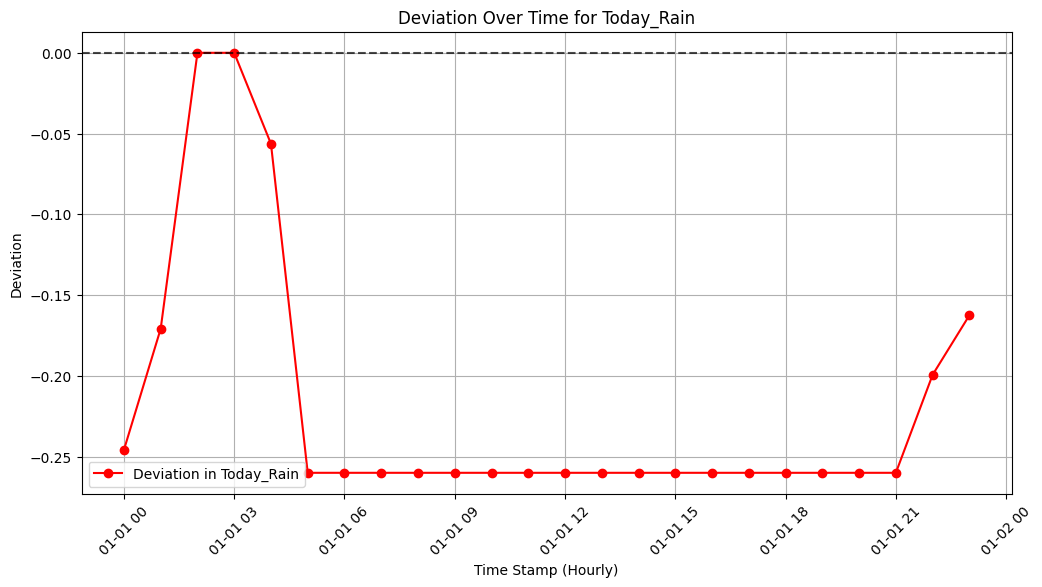

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to process each file and return resampled dataframe
def process_file(file_path):
    # Load the Excel file
    df = pd.read_excel(file_path)

    # Rename columns for consistency
    df.columns = ["Time_Stamp", "Radiation_GHI", "Radiation_GII", "Radiation_GHI_Acc",
                  "Radiation_GII_Acc", "Wind_Speed", "Wind_Direction", "Humidity",
                  "Ambient_Temperature", "Module_Temperature", "Rain",
                  "Diffuse_Radiation", "Today_Rain"]

    # Convert Time_Stamp to datetime
    df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], errors="coerce")

    # Convert numeric columns
    numeric_columns = df.columns[1:]  # Exclude Time_Stamp
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

    # Drop missing values
    df = df.dropna(subset=["Time_Stamp"])

    # Set Time_Stamp as index for resampling
    df.set_index("Time_Stamp", inplace=True)

    # Resample data to hourly intervals (mean values per hour)
    df_resampled = df.resample("h").mean()

    return df_resampled

# Process both files
df_resampled_1 = process_file("/content/Book2.xlsx")
df_resampled_2 = process_file("/content/Book3.xlsx")

# Ensure both datasets have the same time index
df_resampled_1, df_resampled_2 = df_resampled_1.align(df_resampled_2, join="inner")

# Get the common columns
common_columns = df_resampled_1.columns.intersection(df_resampled_2.columns)

# Calculate the deviation (difference) between corresponding columns
df_deviation = df_resampled_1[common_columns] - df_resampled_2[common_columns]

# Compute the standard deviation of these differences
std_dev_between_graphs = df_deviation.std()

# Print standard deviation values
print("Standard Deviation Between Graphs (Column-wise):")
print(std_dev_between_graphs, "\n")

# Plot deviation for each column over time
for col in common_columns:
    plt.figure(figsize=(12, 6))

    # Plot deviation (difference) over time
    plt.plot(df_deviation.index, df_deviation[col], marker='o', linestyle="-", color="red", label=f"Deviation in {col}")

    # Plot zero reference line
    plt.axhline(y=0, color="black", linestyle="--", alpha=0.7)

    plt.xlabel("Time Stamp (Hourly)")
    plt.ylabel("Deviation")
    plt.title(f"Deviation Over Time for {col}")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    plt.show()

Standard Deviation of the Differences Between the Two Files Column-wise:
Radiation_GHI           29.234366
Radiation_GII           43.235858
Radiation_GHI_Acc        0.149939
Radiation_GII_Acc        0.208779
Wind_Speed               0.018435
Wind_Direction         109.927591
Humidity                 3.797537
Ambient_Temperature      0.278361
Module_Temperature       1.289801
Rain                     0.000000
Diffuse_Radiation      114.698079
Today_Rain               0.082772
dtype: float64 



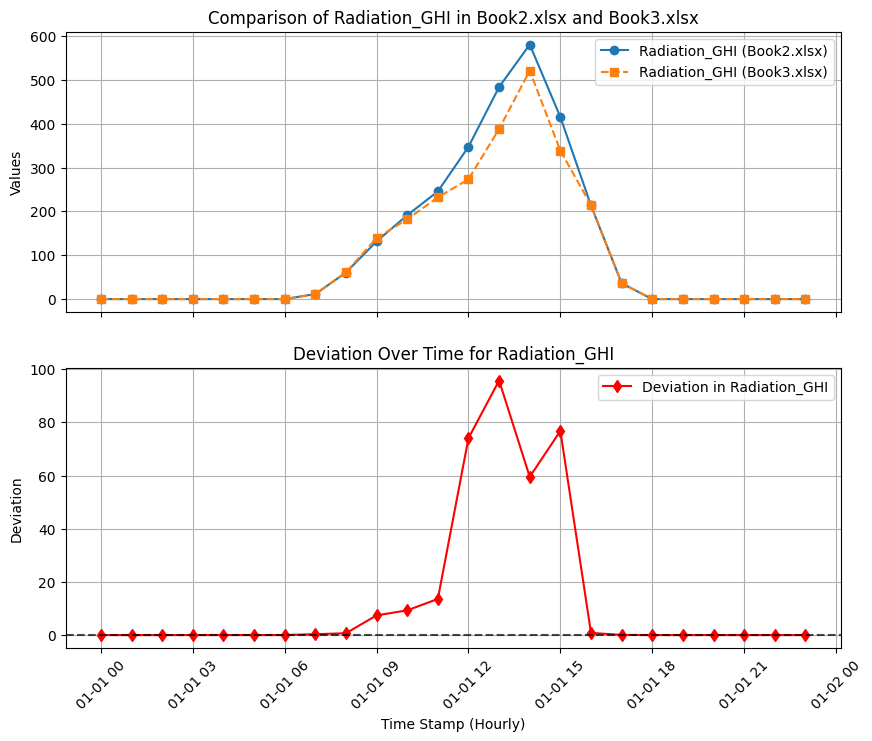

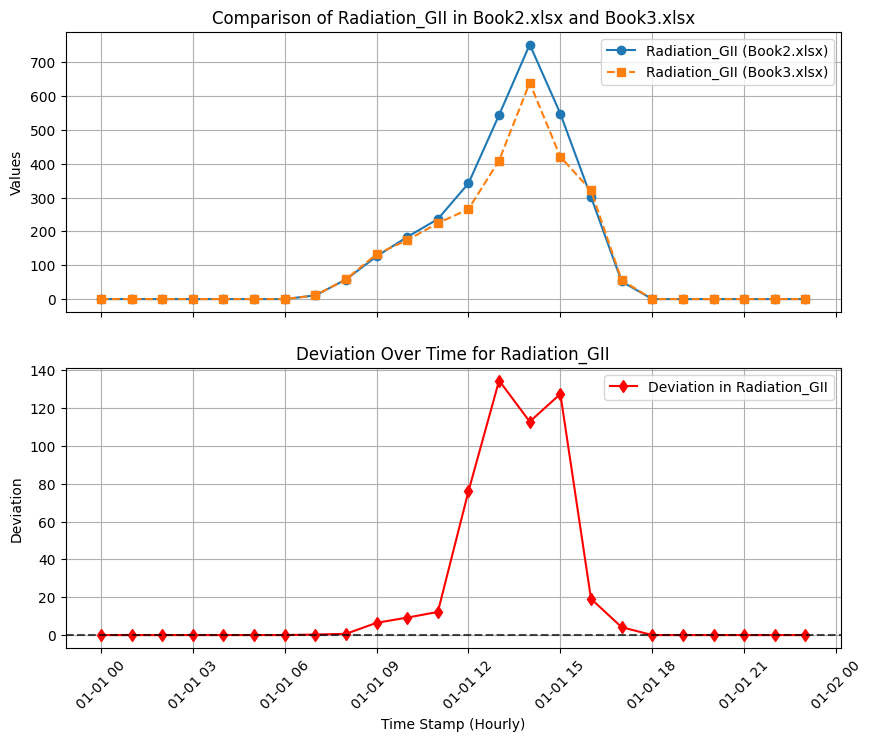

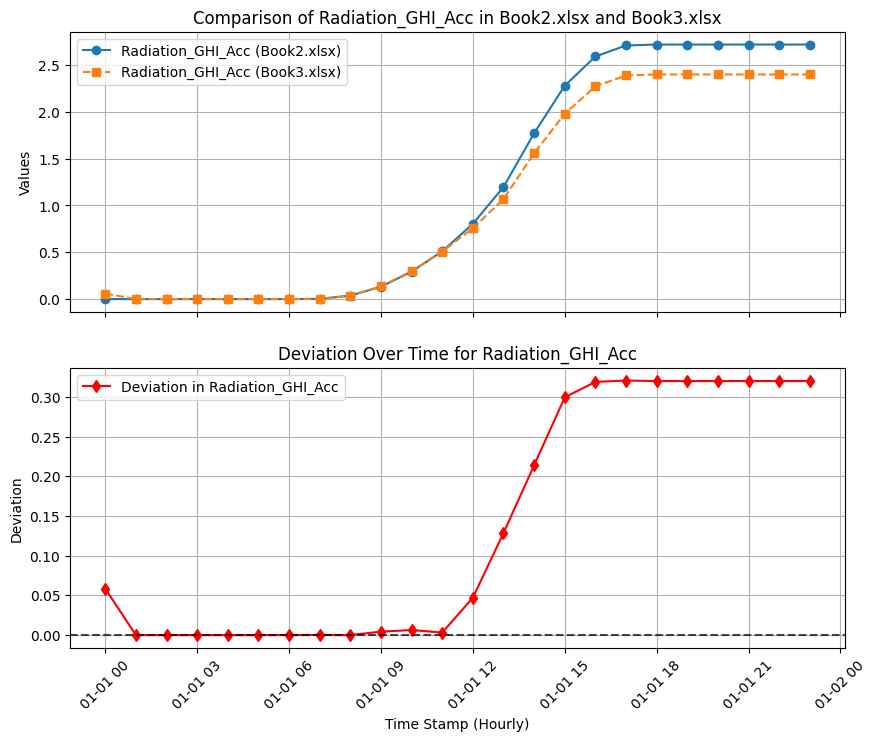

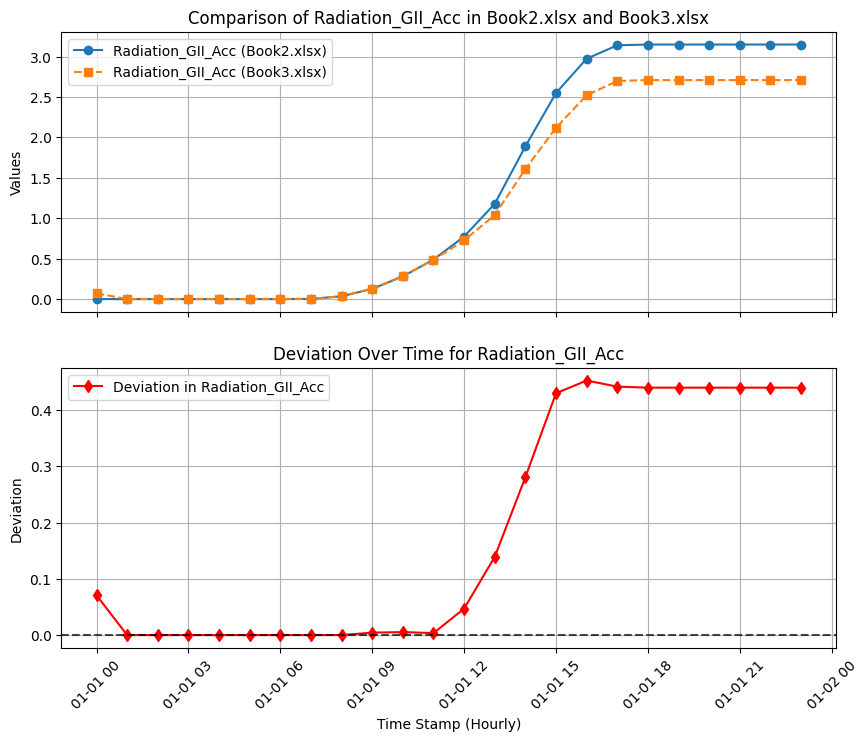

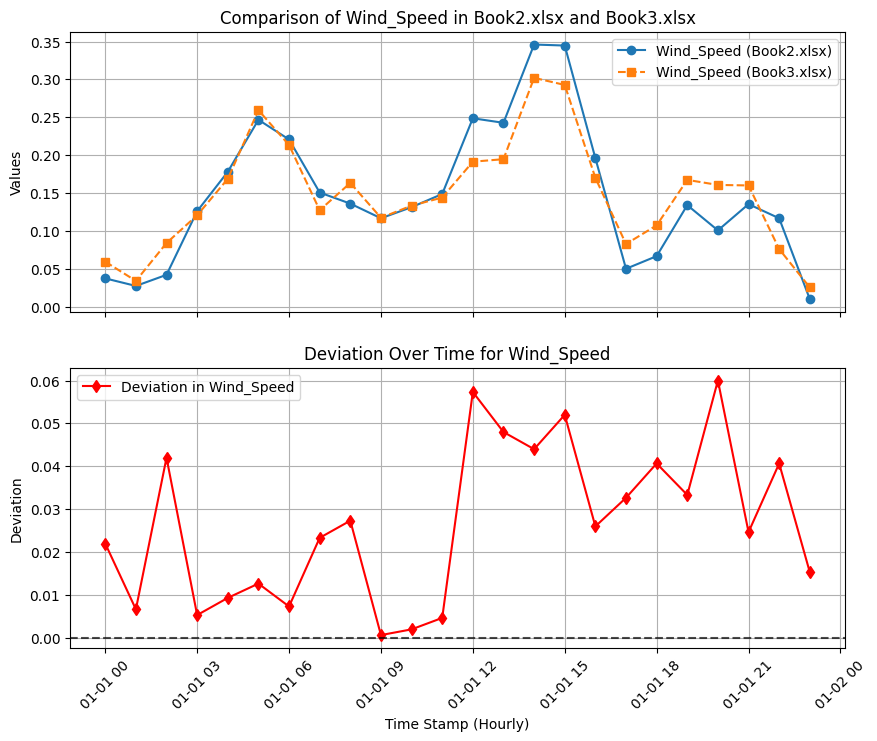

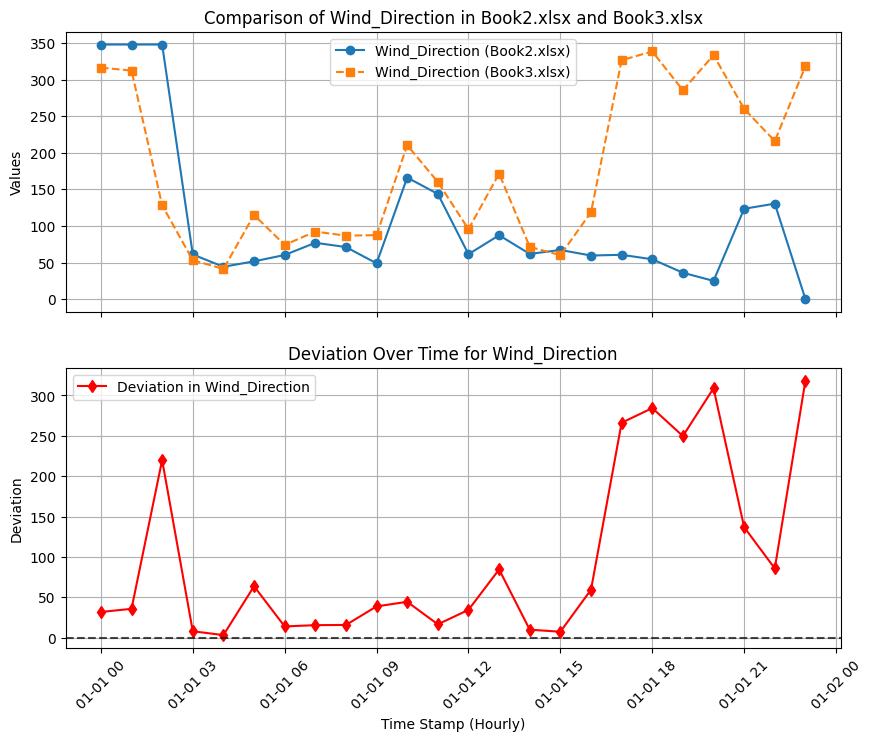

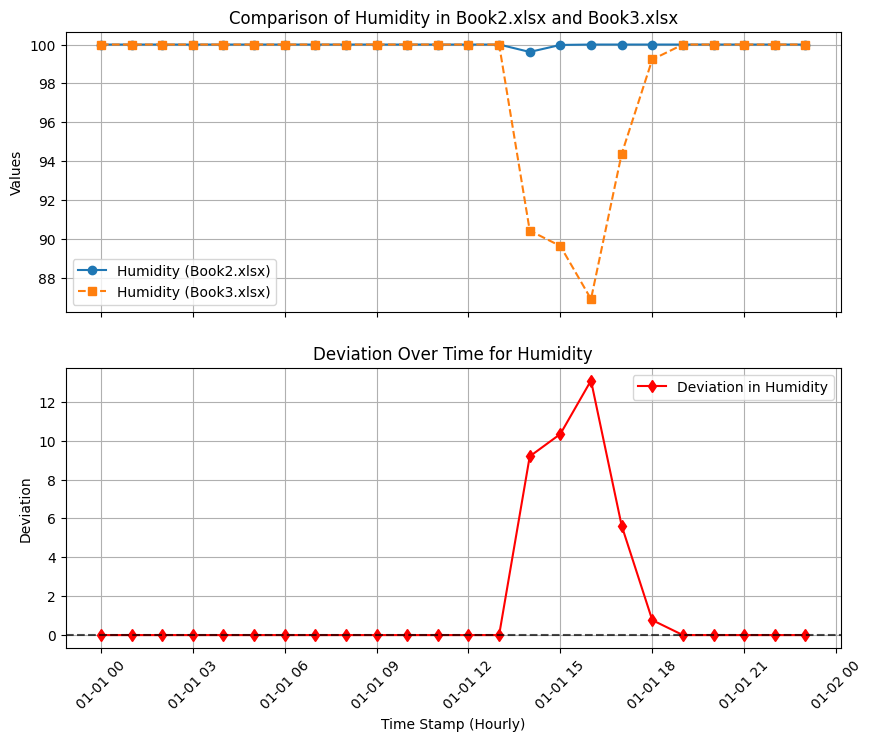

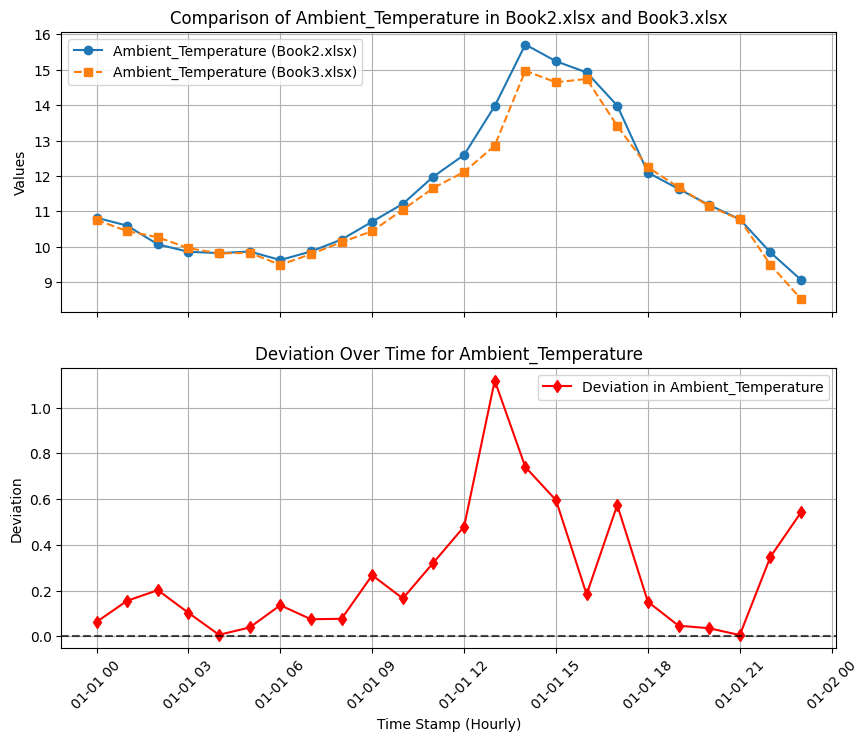

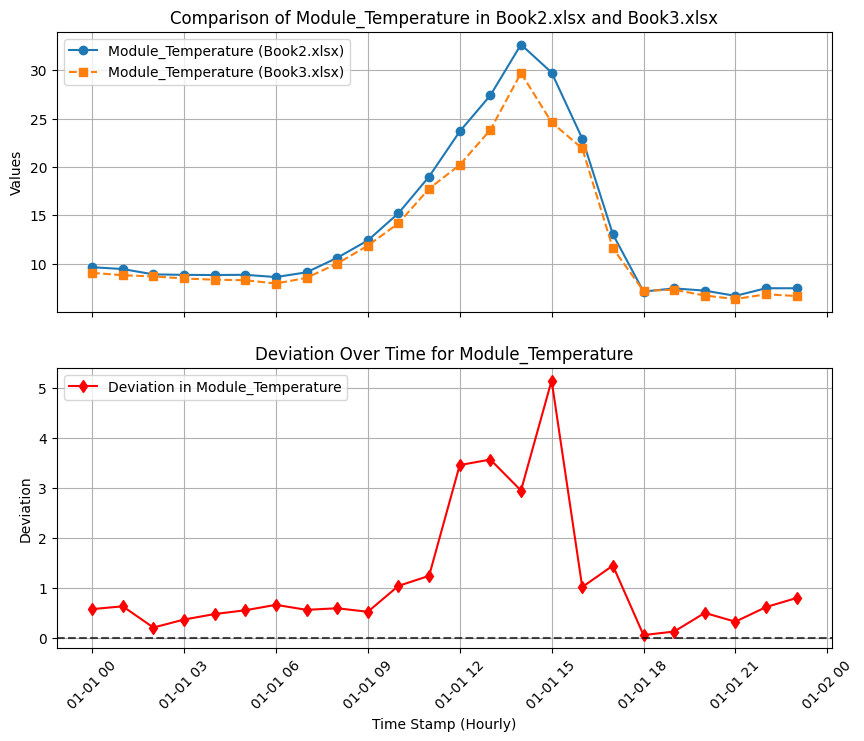

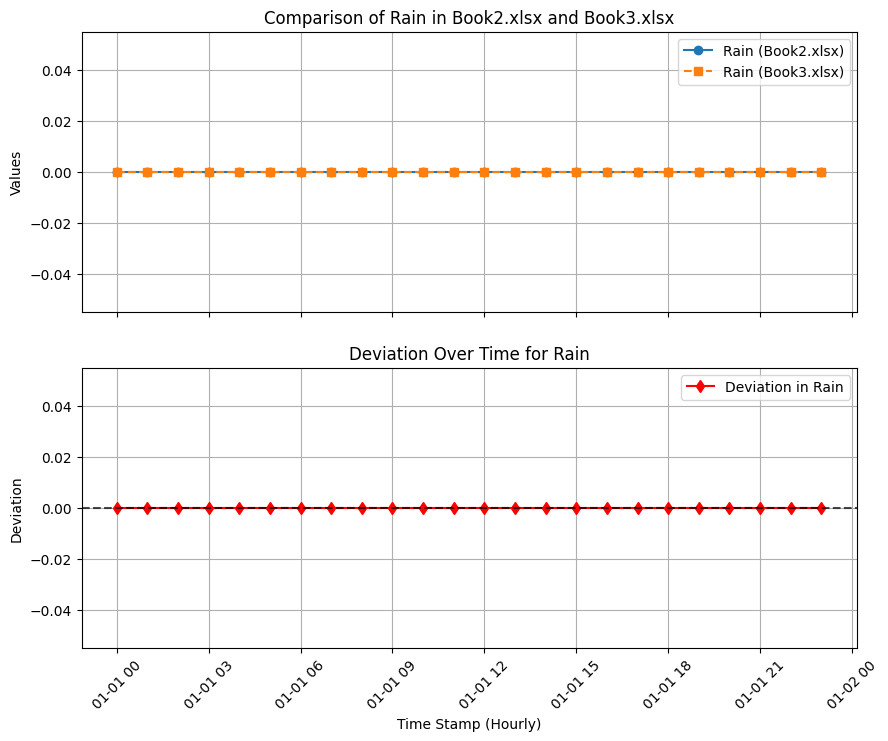

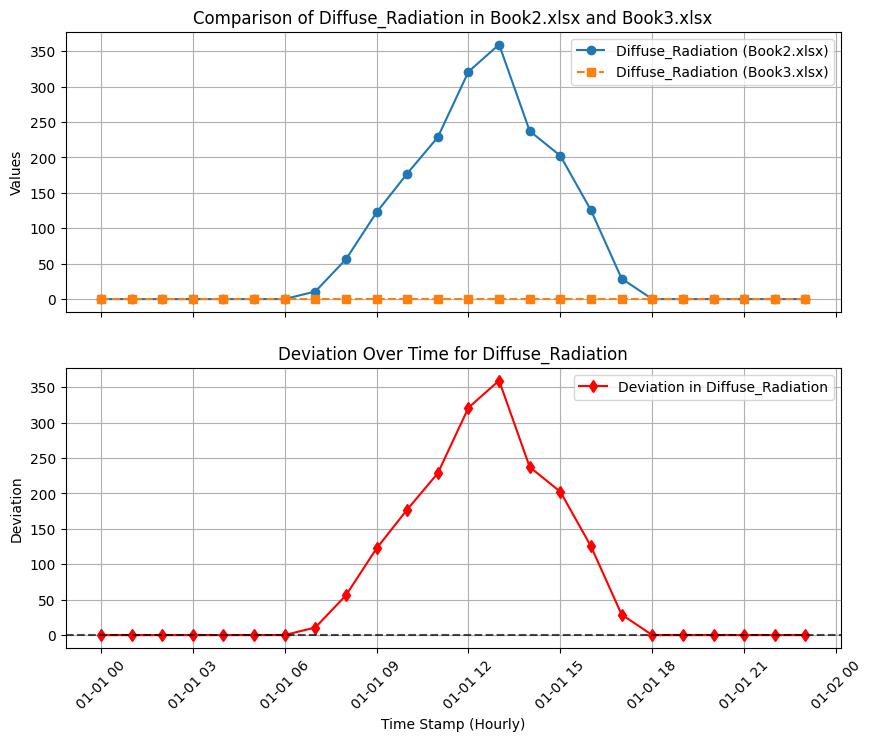

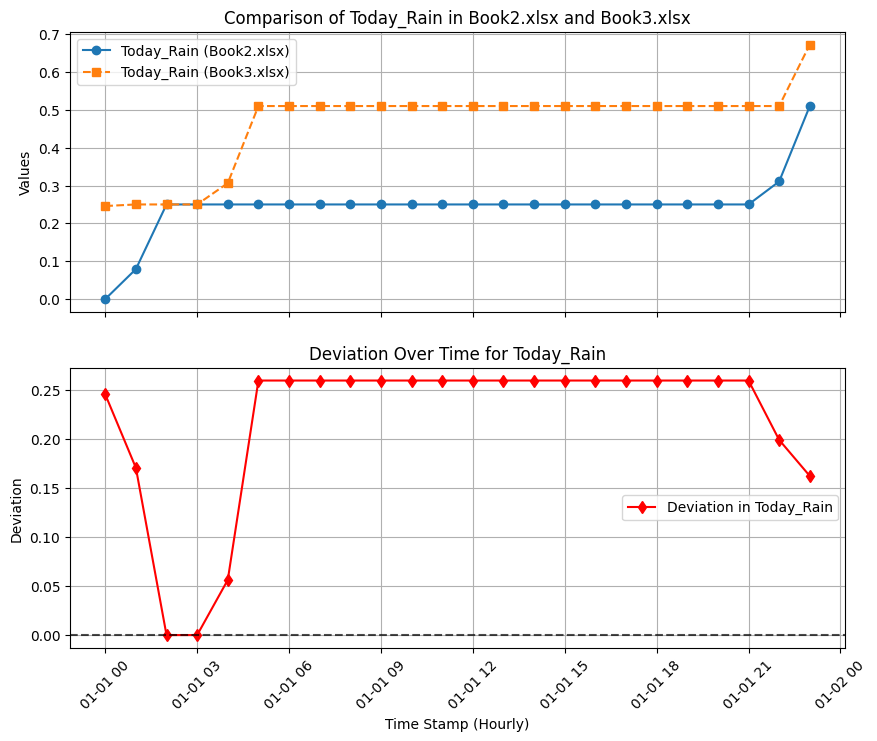

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to process each file and return resampled dataframe
def process_file(file_path):
    # Load the Excel file
    df = pd.read_excel(file_path)

    # Rename columns for consistency
    df.columns = ["Time_Stamp", "Radiation_GHI", "Radiation_GII", "Radiation_GHI_Acc",
                  "Radiation_GII_Acc", "Wind_Speed", "Wind_Direction", "Humidity",
                  "Ambient_Temperature", "Module_Temperature", "Rain",
                  "Diffuse_Radiation", "Today_Rain"]

    # Convert Time_Stamp to datetime
    df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], errors="coerce")

    # Convert numeric columns
    numeric_columns = df.columns[1:]  # Exclude Time_Stamp
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

    # Drop missing values
    df = df.dropna(subset=["Time_Stamp"])

    # Set Time_Stamp as index for resampling
    df.set_index("Time_Stamp", inplace=True)

    # Resample data to hourly intervals (mean values per hour)
    df_resampled = df.resample("h").mean()

    return df_resampled

# Process both files
df_resampled_1 = process_file("/content/Book2.xlsx")
df_resampled_2 = process_file("/content/Book3.xlsx")

# Ensure both datasets have the same time index
df_resampled_1, df_resampled_2 = df_resampled_1.align(df_resampled_2, join="inner")

# Get the common columns
common_columns = df_resampled_1.columns.intersection(df_resampled_2.columns)

# Calculate the absolute deviation (difference between values)
df_deviation = abs(df_resampled_1[common_columns] - df_resampled_2[common_columns])

# Calculate standard deviation of the deviations
std_dev_between_graphs = df_deviation.std()

# Print standard deviation of deviations
print("Standard Deviation of the Differences Between the Two Files Column-wise:")
print(std_dev_between_graphs, "\n")

# Plot original graphs + deviation in a third subplot
for col in common_columns:
    fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Plot first dataset
    axs[0].plot(df_resampled_1.index, df_resampled_1[col], marker='o', linestyle="-", label=f"{col} (Book2.xlsx)")
    axs[0].plot(df_resampled_2.index, df_resampled_2[col], marker='s', linestyle="--", label=f"{col} (Book3.xlsx)")
    axs[0].set_ylabel("Values")
    axs[0].set_title(f"Comparison of {col} in Book2.xlsx and Book3.xlsx")
    axs[0].legend()
    axs[0].grid(True)

    # Plot deviation
    axs[1].plot(df_deviation.index, df_deviation[col], marker='d', linestyle="-", color="red", label=f"Deviation in {col}")
    axs[1].axhline(y=0, color="black", linestyle="--", alpha=0.7)
    axs[1].set_xlabel("Time Stamp (Hourly)")
    axs[1].set_ylabel("Deviation")
    axs[1].set_title(f"Deviation Over Time for {col}")
    axs[1].legend()
    axs[1].grid(True)

    plt.xticks(rotation=45)
    plt.show()

Standard Deviation of the Differences Between the Two Files Column-wise:
Radiation_GHI           29.234366
Radiation_GII           43.235858
Radiation_GHI_Acc        0.149939
Radiation_GII_Acc        0.208779
Wind_Speed               0.018435
Wind_Direction         109.927591
Humidity                 3.797537
Ambient_Temperature      0.278361
Module_Temperature       1.289801
Rain                     0.000000
Diffuse_Radiation      114.698079
Today_Rain               0.082772
dtype: float64 



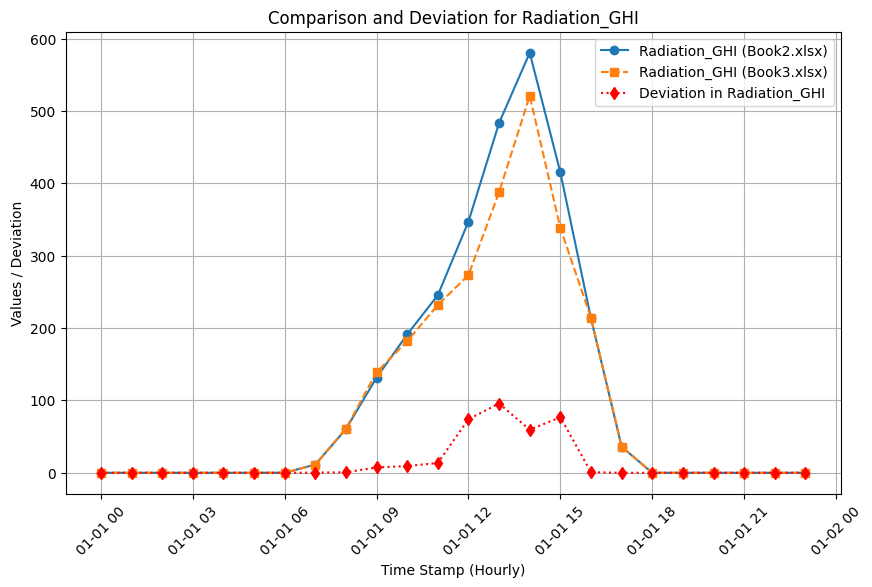

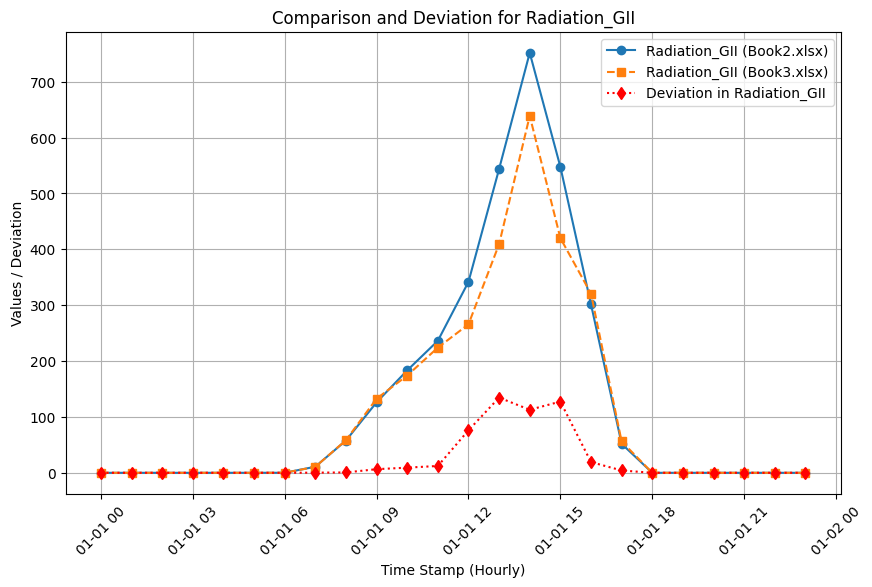

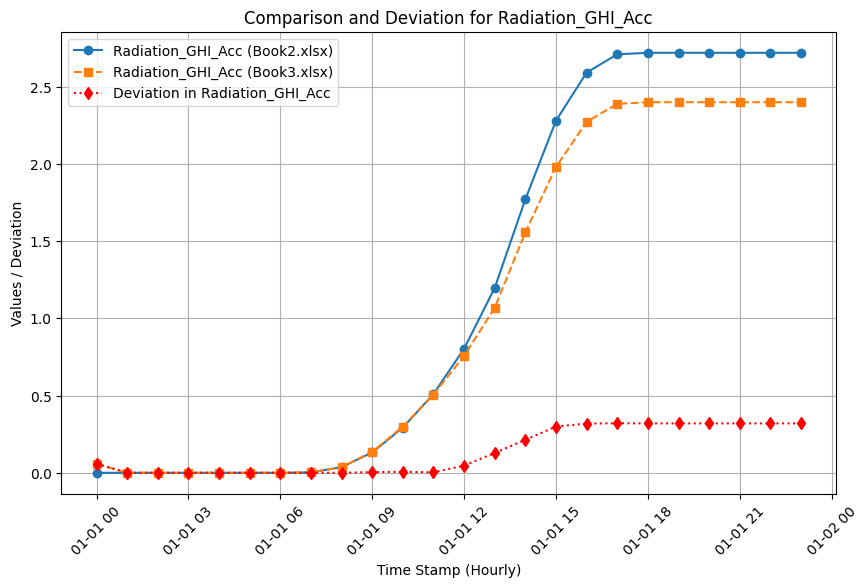

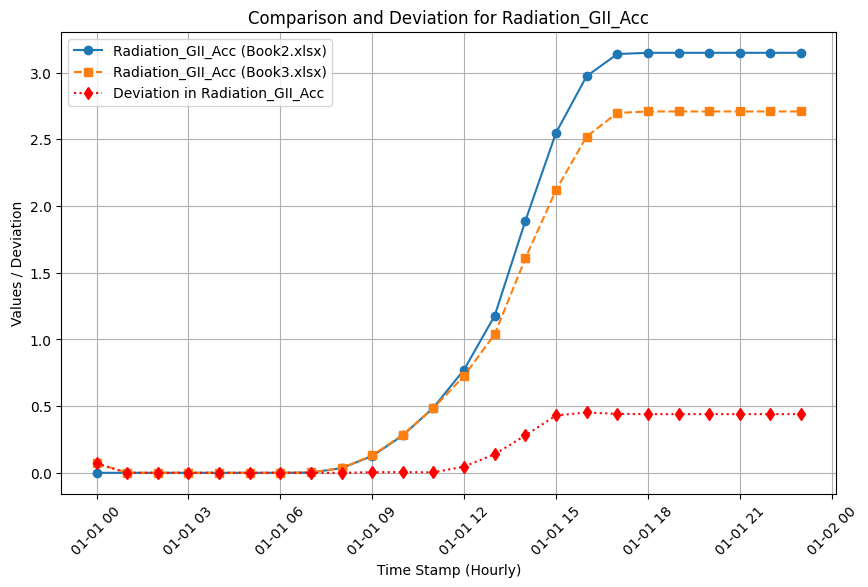

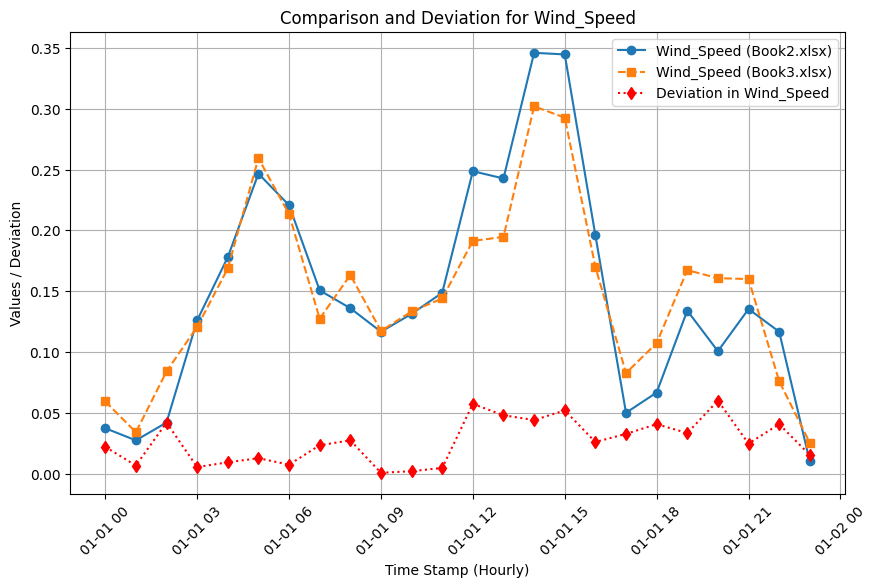

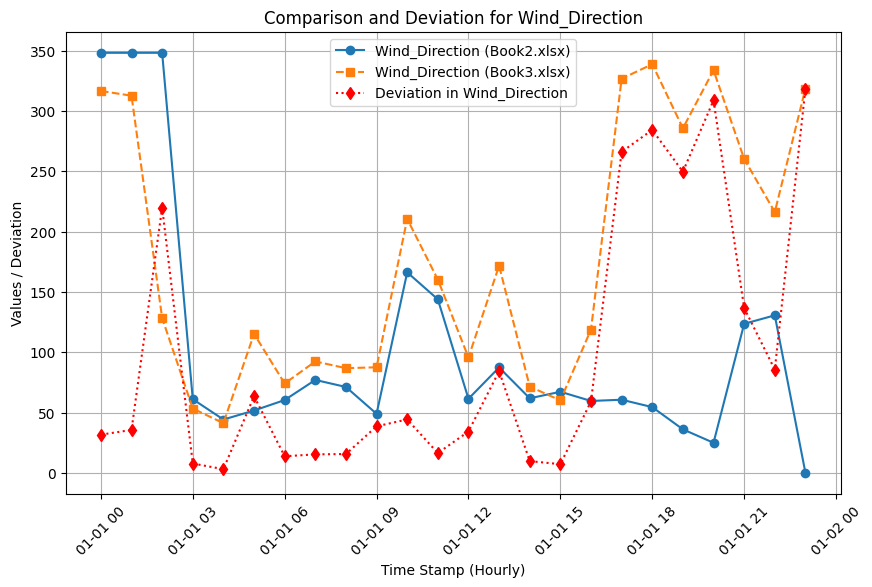

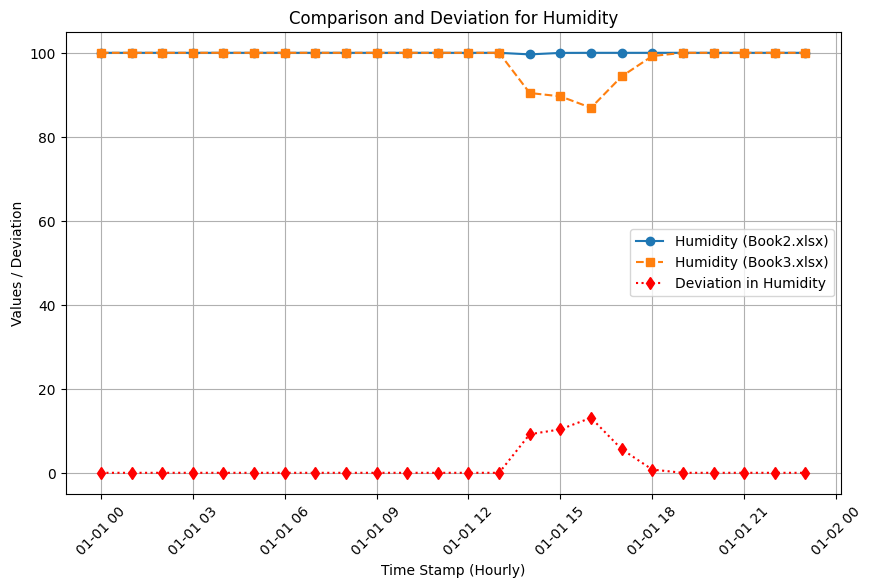

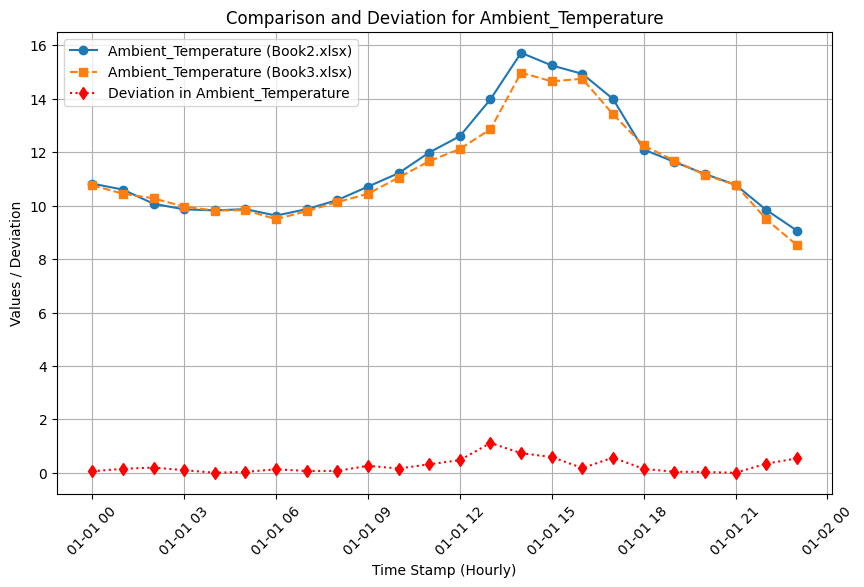

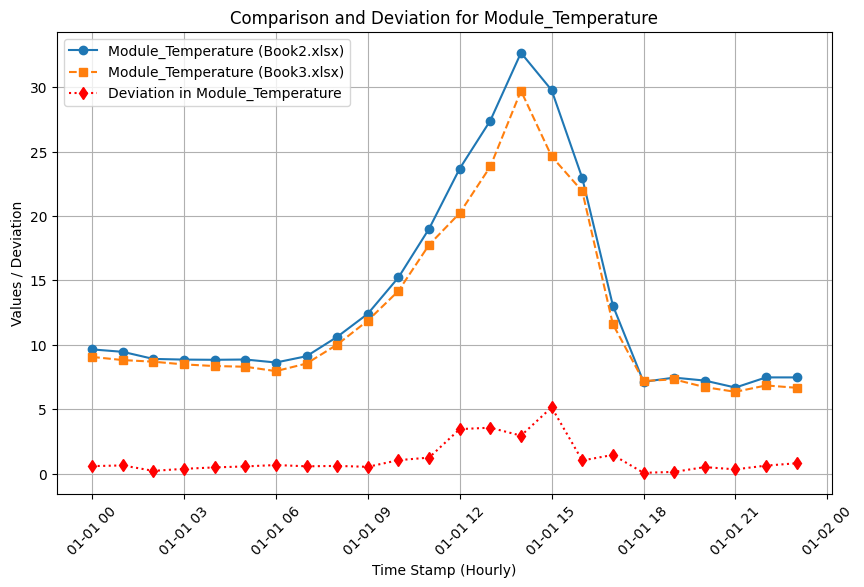

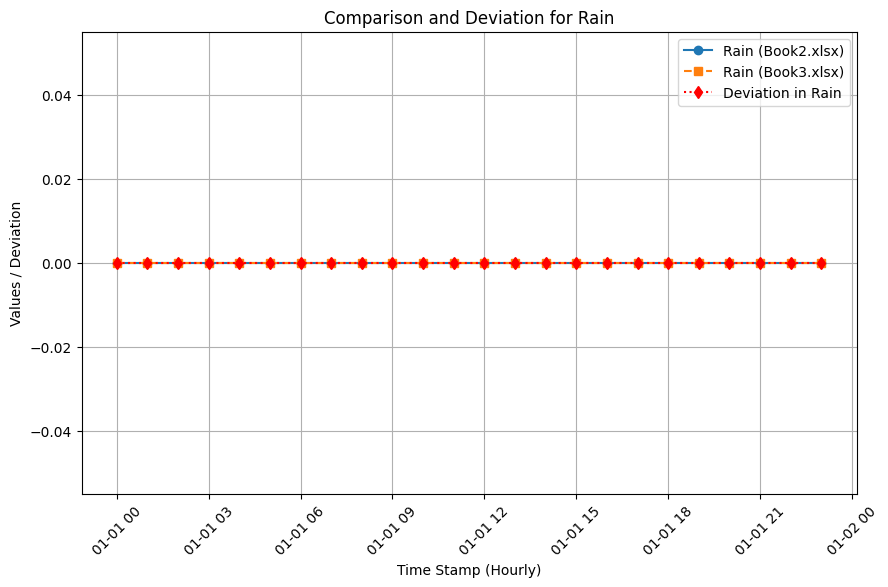

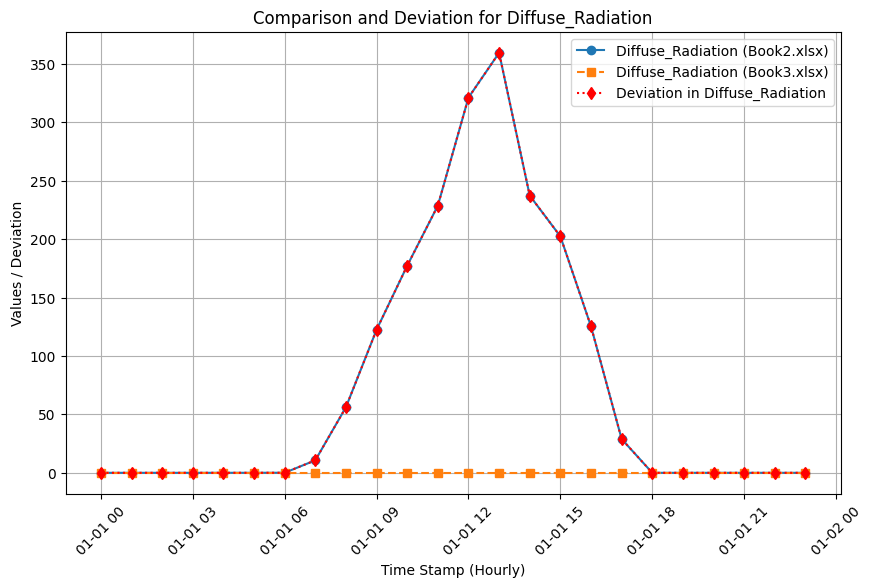

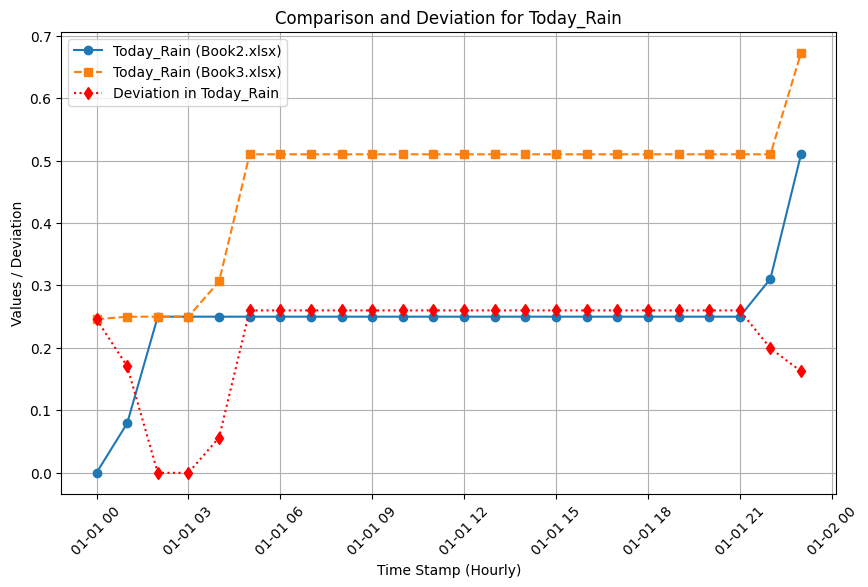

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to process each file and return resampled dataframe
def process_file(file_path):
    # Load the Excel file
    df = pd.read_excel(file_path)

    # Rename columns for consistency
    df.columns = ["Time_Stamp", "Radiation_GHI", "Radiation_GII", "Radiation_GHI_Acc",
                  "Radiation_GII_Acc", "Wind_Speed", "Wind_Direction", "Humidity",
                  "Ambient_Temperature", "Module_Temperature", "Rain",
                  "Diffuse_Radiation", "Today_Rain"]

    # Convert Time_Stamp to datetime
    df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], errors="coerce")

    # Convert numeric columns
    numeric_columns = df.columns[1:]  # Exclude Time_Stamp
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

    # Drop missing values
    df = df.dropna(subset=["Time_Stamp"])

    # Set Time_Stamp as index for resampling
    df.set_index("Time_Stamp", inplace=True)

    # Resample data to hourly intervals (mean values per hour)
    df_resampled = df.resample("h").mean()

    return df_resampled

# Process both files
df_resampled_1 = process_file("/content/Book2.xlsx")
df_resampled_2 = process_file("/content/Book3.xlsx")

# Ensure both datasets have the same time index
df_resampled_1, df_resampled_2 = df_resampled_1.align(df_resampled_2, join="inner")

# Get the common columns
common_columns = df_resampled_1.columns.intersection(df_resampled_2.columns)

# Calculate the absolute deviation (difference between values)
df_deviation = abs(df_resampled_1[common_columns] - df_resampled_2[common_columns])

# Calculate standard deviation of the deviations
std_dev_between_graphs = df_deviation.std()

# Print standard deviation of deviations
print("Standard Deviation of the Differences Between the Two Files Column-wise:")
print(std_dev_between_graphs, "\n")

# Plot original graphs + deviation in the same subplot
for col in common_columns:
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot first dataset
    ax.plot(df_resampled_1.index, df_resampled_1[col], marker='o', linestyle="-", label=f"{col} (Book2.xlsx)")
    ax.plot(df_resampled_2.index, df_resampled_2[col], marker='s', linestyle="--", label=f"{col} (Book3.xlsx)")

    # Plot deviation
    ax.plot(df_deviation.index, df_deviation[col], marker='d', linestyle=":", color="red", label=f"Deviation in {col}")

    # Adding titles and labels
    ax.set_xlabel("Time Stamp (Hourly)")
    ax.set_ylabel("Values / Deviation")
    ax.set_title(f"Comparison and Deviation for {col}")
    ax.legend()
    ax.grid(True)

    plt.xticks(rotation=45)
    plt.show()
